In [1]:
!pip install plotnine

In [2]:
#Importing the libraries which will be helpful for the data analysis.

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import show
from matplotlib.colors import ListedColormap
from plotnine import *
import matplotlib.pyplot as Pyplot

from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats import shapiro
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,validation_curve, StratifiedShuffleSplit,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification


from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn import over_sampling

In [3]:
import warnings
warnings.warn('foo', DeprecationWarning)
import warnings, sklearn.utils
warnings.warn('bar', DeprecationWarning)

C:\Users\ankit\AppData\Local\Temp\ipykernel_14052\255715532.py:2: DeprecationWarning: foo
C:\Users\ankit\AppData\Local\Temp\ipykernel_14052\255715532.py:4: DeprecationWarning: bar


In [4]:
# Creating the seperator for better data visualization among each variables

def Line_Separator():
    print('*'*50, '\n')
    
def Line_Separator1():
    print('*'*100, '\n')

In [5]:
#Importing the dataset

dataset = pd.read_csv('creditcard.csv', index_col=None)

dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Evaluating the number of columns and rows in the given dataset

No_of_rows = dataset.shape[0]
No_of_columns = dataset.shape[1]

print('No. of rows in creditcard file     :', No_of_rows)
print('No. of columns in creditcard file  :', No_of_columns); Line_Separator()

No. of rows in creditcard file     : 284807
No. of columns in creditcard file  : 31
************************************************** 



In [7]:
# Reviewing the columns title in the given dataset

print("Columns name in creditcard file :\n",dataset.columns.values);Line_Separator1()

Columns name in creditcard file :
 ['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']
**************************************************************************************************** 



In [8]:
# Evaluating the number of categorical and numerical features

def data_features (data):
    categorical_features = dataset.select_dtypes(exclude = [np.number]).columns
    numerical_features = dataset.select_dtypes(include = [np.number]).columns
    print("Categorical features in creditcard file :\n",categorical_features);Line_Separator1()
    print("Numerical features in creditcard file   :\n",numerical_features);Line_Separator1()
    
print(data_features(dataset))

Categorical features in creditcard file :
 Index([], dtype='object')
**************************************************************************************************** 

Numerical features in creditcard file   :
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
**************************************************************************************************** 

None


In [9]:
# Checking datatypes of each column

print("Review the Data Format in creditcard file :");Line_Separator()
print(dataset.dtypes);Line_Separator()

Review the Data Format in creditcard file :
************************************************** 

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
************************************************** 



In [10]:
# Checking if we have missing data in the dataframe

print("Check if there is any missing value in creditcard file :");Line_Separator()
print(round(100*(dataset.isnull()).sum()/len(dataset),2).sort_values(ascending=False));Line_Separator()

Check if there is any missing value in creditcard file :
************************************************** 

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64
************************************************** 



In [11]:
print("Time variable statistics");Line_Separator()
dataset['Time'].describe()

Time variable statistics
************************************************** 



count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [12]:
# Data is 48hours but the values seems to represent seconds so will convert it to hours - 1hour =3600seconds 

dataset['Time'] =dataset['Time']/3600

In [13]:
# Assigning classes one and zero for visualization 

def replace_data_to_binary(x,y):
    dataset.Class.replace(x,y, inplace=True)
  
    
replace_data_to_binary(0, 'Non Fraudulent')
replace_data_to_binary(1, 'Fraudulent')

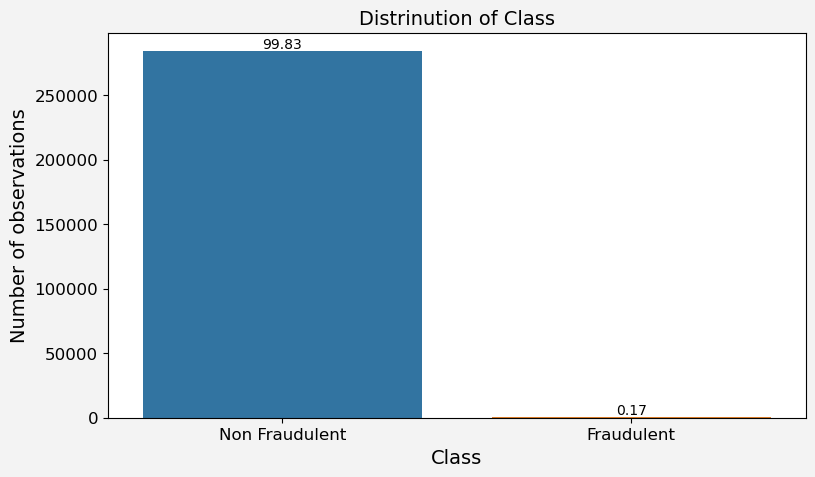

**************************************************************************************************** 



In [14]:
# Readmitted distribution

fig = plt.figure(figsize=(9,5))
fig.set_facecolor("#F3F3F3")
total = float(len(dataset)) 
ax = sns.countplot(x="Class",  data=dataset)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of observations', fontsize=14)
plt.title('Distrinution of Class', fontsize =14)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(100*height/total), 
            ha="center",va='bottom')
ax.grid(False)
plt.tick_params(labelsize=12)
plt.show();Line_Separator1()

In [15]:
# Evaluating whether data is balanced or not 

total_count_combined_class = dataset['Class'].value_counts()
imbalance= (total_count_combined_class['Fraudulent']/dataset
            ['Class'].count()*100)/(total_count_combined_class['Non Fraudulent']/dataset['Class'].count()*100)*100
print('Imbalance Percentage : ' + str(imbalance));Line_Separator()

Imbalance Percentage : 0.173047500131896
************************************************** 



In [16]:
print("Amount details of transaction :");Line_Separator()
print(dataset[dataset["Class"] == "Fraudulent"].Amount.describe());Line_Separator()

print('\n')

print("Amount details of non-fraudulent transaction :");Line_Separator()
print(dataset[dataset["Class"] == "Non Fraudulent"].Amount.describe());Line_Separator()

Amount details of transaction :
************************************************** 

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
************************************************** 



Amount details of non-fraudulent transaction :
************************************************** 

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
************************************************** 



## We understand from the above statistics that the average money 
## transaction for the fraudulent ones is observed more compared to non-fraudulent ones.

Evaluate the time vs. amount transaction between fraudulent and non-fraudulent
**************************************************************************************************** 



C:\Users\ankit\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight


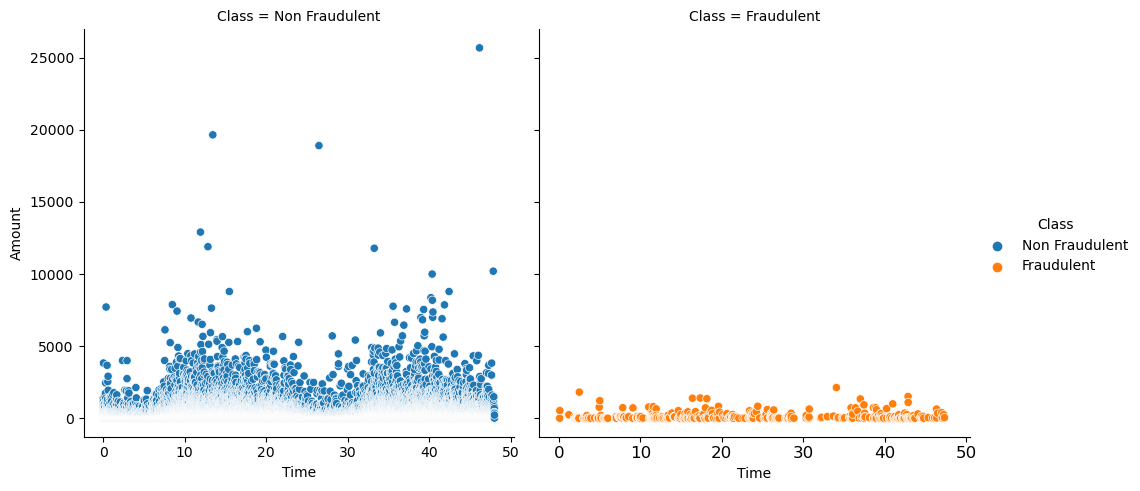

**************************************************************************************************** 



In [17]:
# Evaluating time vs. amount transaction between fraudulent and non-fraudulent

print("Evaluate the time vs. amount transaction between fraudulent and non-fraudulent");Line_Separator1()
ax=sns.relplot(x="Time", y="Amount",
                 col="Class", hue="Class",
                 kind="scatter", data=dataset)
plt.tick_params(labelsize=12)
plt.show(); Line_Separator1()

## Few insights on the visualization above reveal the following:
##    1.The plot indicates that the fraud amounts were less than approx 2.2k.
##    2. Fraud pattern indicates that the number of data points is observed between 14 to 20 hours on both days.
##    3. We can see a two-picks pattern in time due tonight.

In [18]:
# Assigning back to class one and zero for analysis

def replace_data_to_binary(x,y):
    dataset.Class.replace(x,y, inplace=True)
  
    
replace_data_to_binary('Non Fraudulent', 0)
replace_data_to_binary ('Fraudulent', 1)

In [19]:
print("After reassigning class to zero and one, we will evaluate the data type ");Line_Separator1()
dataset.dtypes

After reassigning class to zero and one, we will evaluate the data type 
**************************************************************************************************** 



Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

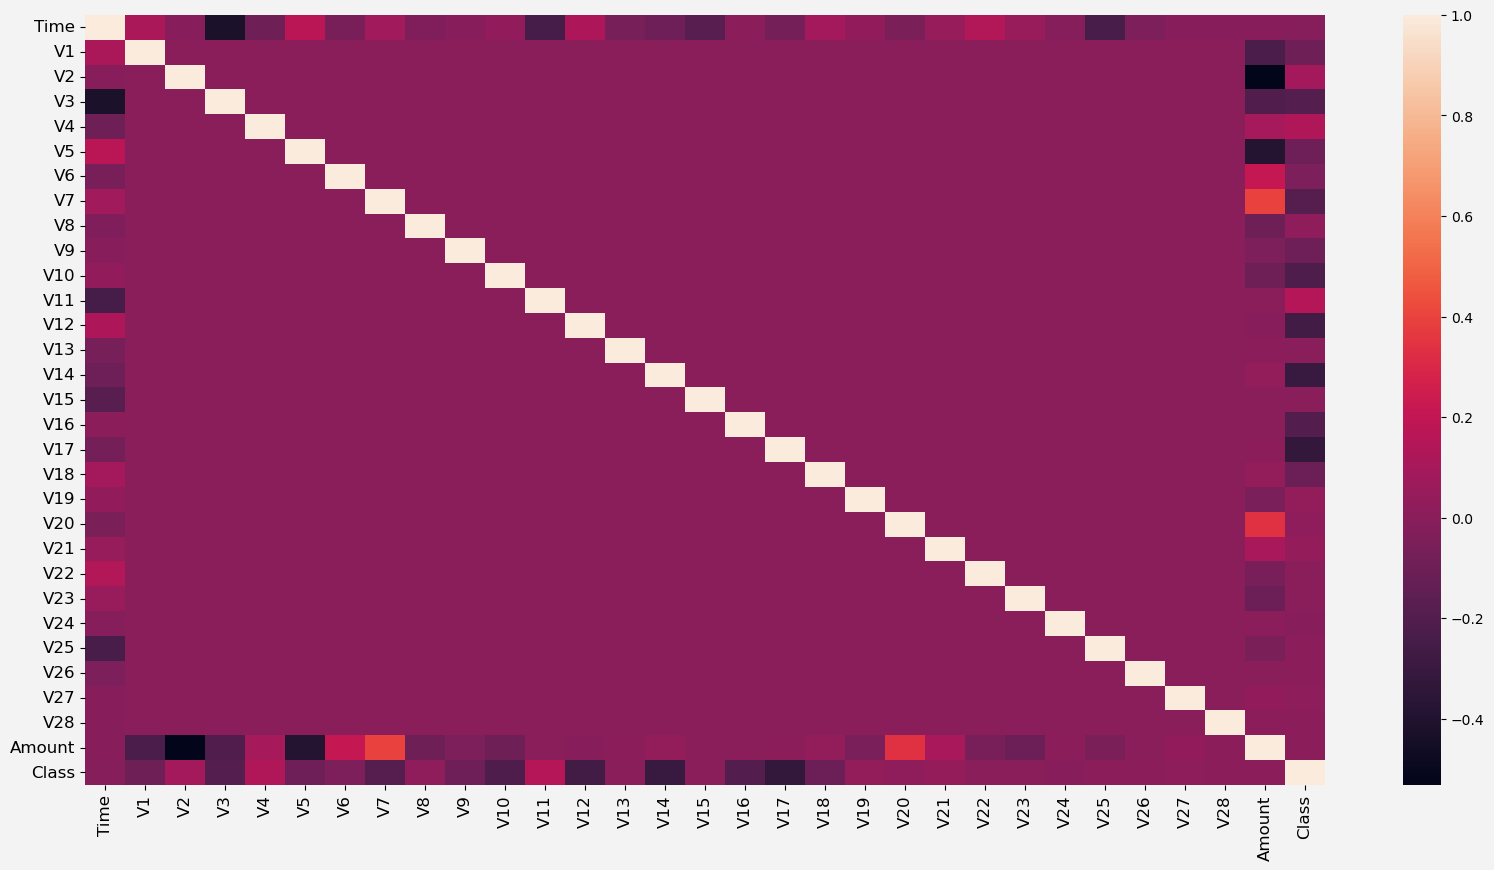

**************************************************************************************************** 



In [20]:
# Evaluating the correlation between different parameters in the dataset if any 

dataset_corr=dataset.corr()
fig = plt.figure(figsize=(20,10))
fig.set_facecolor("#F3F3F3")
ax=sns.heatmap(dataset_corr)
plt.tick_params(labelsize=12)
plt.show();Line_Separator1()

## Few insights on the visualization above reveal the following:

#   V7 and V20 are positively correlated with the amount.
#   V2 and V5 are negatively correlated with the amount.


**************************************************************************************************** 

Plotting the Shape of a Distribution of each Variable in'Non-Fraudulent' & 'Fraudulent': Variables V1 to V12
**************************************************************************************************** 



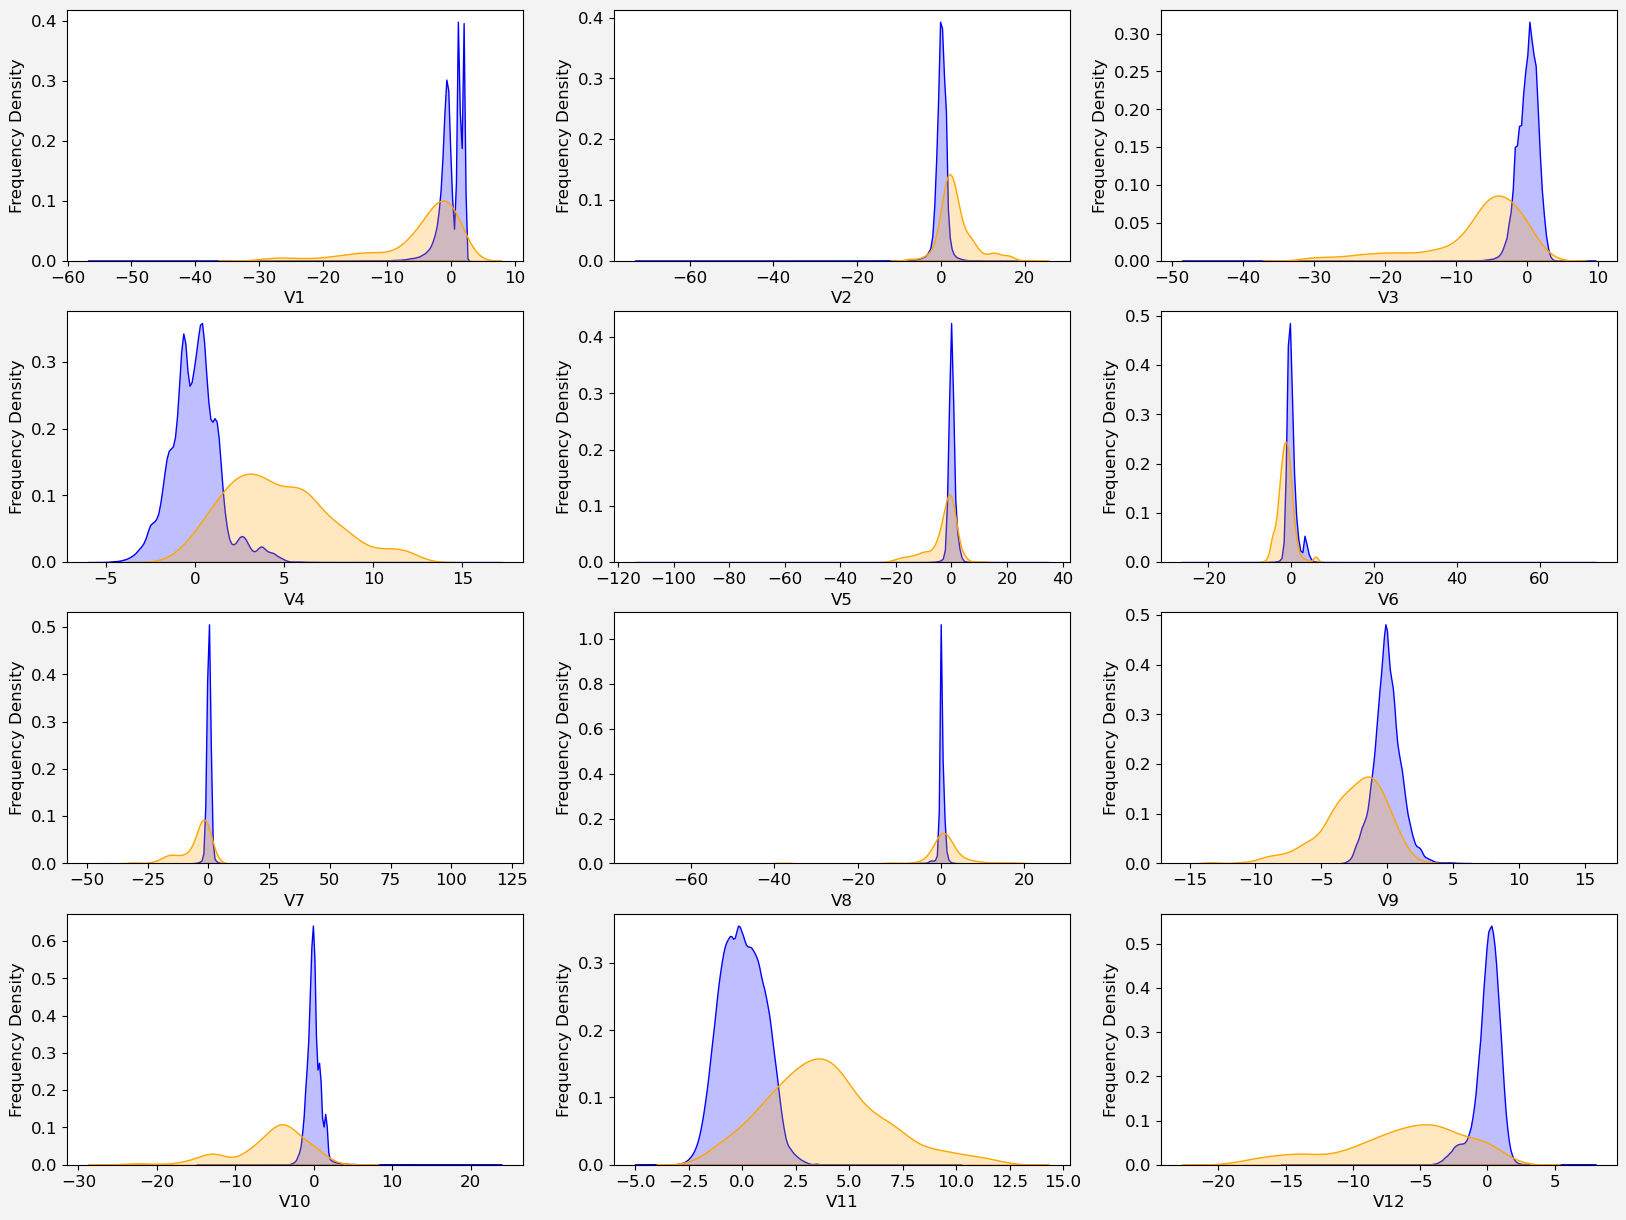

**************************************************************************************************** 



In [21]:
# Exploratory Data Analysis:

print(); Line_Separator1()
print("Plotting the Shape of a Distribution of each Variable in'Non-Fraudulent' & 'Fraudulent': Variables V1 to V12"); Line_Separator1()
fig = plt.figure(figsize=(20,15))
fig.set_facecolor("#F3F3F3")

plt.subplot(431)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V1'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V1'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V1", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(432)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V2'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V2'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V2", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(433)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V3'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V3'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V3", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(434)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V4'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V4'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V4", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(435)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V5'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V5'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V5", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(436)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V6'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V6'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V6", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(437)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V7'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V7'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V7", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(438)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V8'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V8'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V8", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(439)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V9'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V9'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V9", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(4,3,10)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V10'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V10'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V10", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(4,3,11)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V11'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V11'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V11", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(4,3,12)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V12'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V12'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V12", fontsize=12)
plt.tick_params(labelsize=12)

plt.show(); Line_Separator1()


**************************************************************************************************** 

Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables V13 to V24
**************************************************************************************************** 



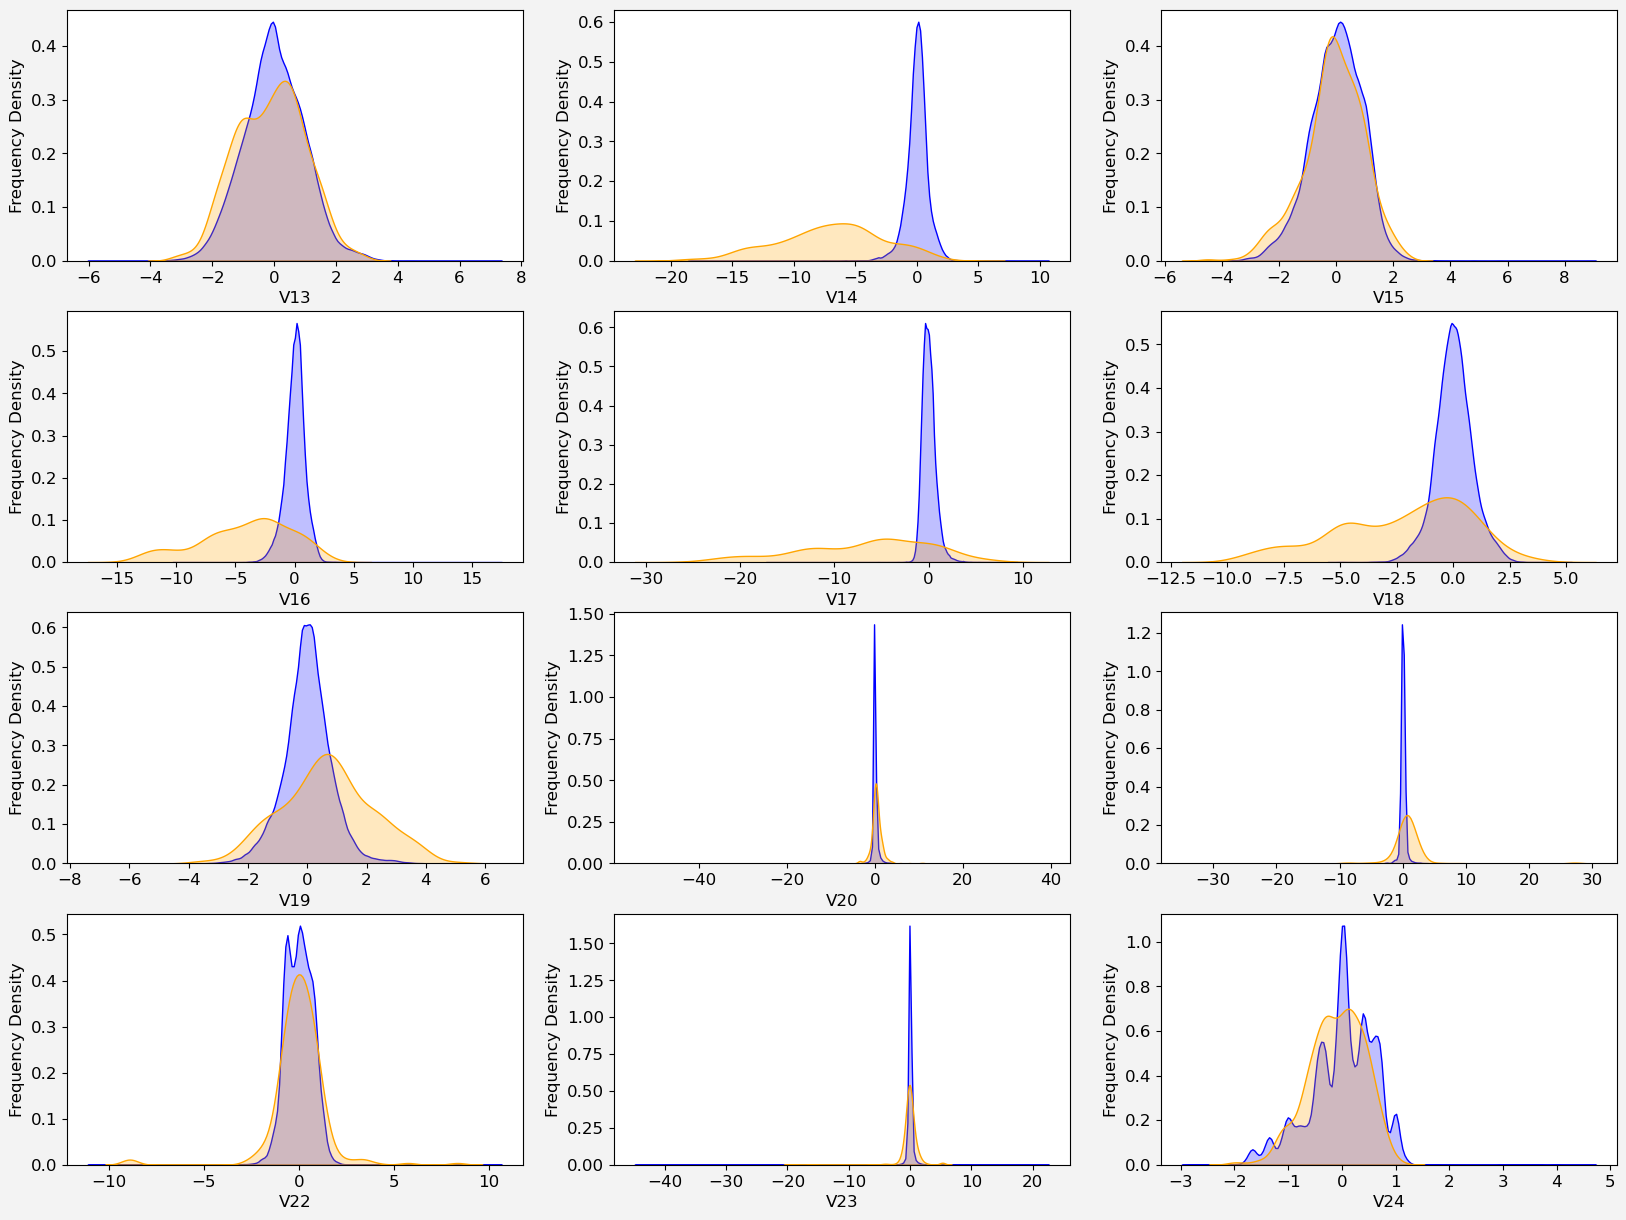

**************************************************************************************************** 



In [22]:
# Evaluating the data distributions of each variable

print(); Line_Separator1()
print("Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables V13 to V24");
Line_Separator1()

fig = plt.figure(figsize=(20,15))
fig.set_facecolor("#F3F3F3")

plt.subplot(431)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V13'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V13'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V13", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(432)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V14'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V14'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V14", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(433)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V15'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V15'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V15", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(434)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V16'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V16'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V16", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(435)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V17'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V17'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V17", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(436)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V18'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V18'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V18", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(437)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V19'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V19'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V19", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(438)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V20'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V20'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V20", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(439)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V21'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V21'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V21", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(4,3,10)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V22'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V22'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V22", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(4,3,11)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V23'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V23'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V23", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(4,3,12)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V24'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V24'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V24", fontsize=12)
plt.tick_params(labelsize=12)

plt.show(); Line_Separator1()


**************************************************************************************************** 

Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables V25 to V28,Time & Amout
**************************************************************************************************** 



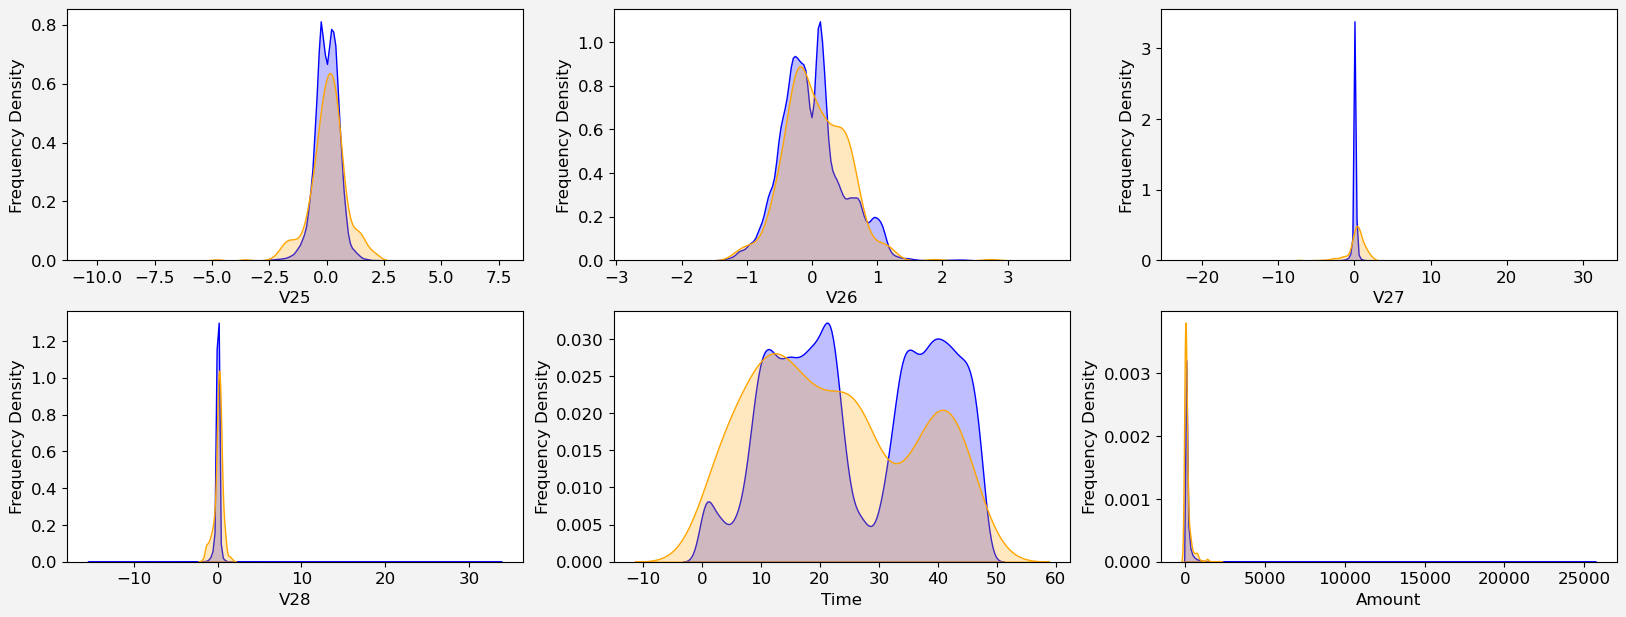

**************************************************************************************************** 



In [23]:
# Evaluating the data distributions of each variable

print(); Line_Separator1()
print("Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables V25 to V28,Time & Amout"); Line_Separator1()
fig = plt.figure(figsize=(20,15))
fig.set_facecolor("#F3F3F3")

plt.subplot(431)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V25'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V25'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V25", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(432)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V26'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V26'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V26", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(433)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V27'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V27'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V27", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(434)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'V28'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'V28'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V28", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(435)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'Time'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'Time'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(436)
g=sns.kdeplot(dataset.loc[(dataset["Class"] == 0),'Amount'] , color='b',fill=True,label='Non Fraudulent')
g=sns.kdeplot(dataset.loc[(dataset['Class'] == 1),'Amount'] , color='orange',fill=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("Amount", fontsize=12)
plt.tick_params(labelsize=12)

plt.show(); Line_Separator1()

In [24]:
# Separating Non-Fraudulent and Fraudulent data to check the skewness and kurtosis

Non_Fraudulent= dataset[dataset["Class"] == 0]
print ("Non_Fraudulent:", Non_Fraudulent.shape); Line_Separator()
Fraudulent= dataset[dataset["Class"] == 1]
print ("Fraudulent:", Fraudulent.shape); Line_Separator()

Non_Fraudulent: (284315, 31)
************************************************** 

Fraudulent: (492, 31)
************************************************** 



In [25]:
# Non_Fraudulent = to check the skewness and kurtosis.

print ("Non_Fraudulent = To evaluate Mean, Variance, skewness, and kurtosis:")
print("")
a = Non_Fraudulent.mean(axis = 0, skipna = True)
b = Non_Fraudulent.var(axis = 0, skipna = True)
c = Non_Fraudulent.skew(axis = 0, skipna = True)
d = Non_Fraudulent.kurtosis(axis = 0, skipna = True)

a.index = b.index
a.index = c.index
a.index = d.index

data_Non_Fraudulent = pd.concat([a, b, c, d] ,axis = 1)
data_Non_Fraudulent.columns = ["Mean", "Var", "Skewness", "kurtosis"]
data_Non_Fraudulent=data_Non_Fraudulent.reset_index().rename(index=str, columns={"index": "Variables"})
print(data_Non_Fraudulent); Line_Separator1()

# -------------------------------------------------------------------------------------------------------------

# Fraudulent = to check the skewness and kurtosis

print ("Fraudulent = To evaluate Mean, Variance, skewness, and kurtosis:")
print("")
e = Fraudulent.mean(axis = 0, skipna = True)
f = Fraudulent.var(axis = 0, skipna = True)
g = Fraudulent.skew(axis = 0, skipna = True)
h = Fraudulent.kurtosis(axis = 0, skipna = True)

e.index = f.index
e.index = g.index
e.index = h.index

data_Fraudulent = pd.concat([a, b, c, d] ,axis = 1)
data_Fraudulent.columns = ["Mean", "Var", "Skewness", "kurtosis"]
data_Fraudulent=data_Fraudulent.reset_index().rename(index=str, columns={"index": "Variables"})
print(data_Fraudulent); Line_Separator1()

Non_Fraudulent = To evaluate Mean, Variance, skewness, and kurtosis:

   Variables       Mean           Var   Skewness    kurtosis
0       Time  26.343945    173.976216  -0.036015   -1.293597
1         V1   0.008258      3.724182  -3.130188   31.065568
2         V2  -0.006271      2.676974  -4.887166   98.406211
3         V3   0.012171      2.129933  -1.453676   14.545345
4         V4  -0.007860      1.958134   0.581137    2.095716
5         V5   0.005453      1.841318  -2.213903  217.852170
6         V6   0.002419      1.768669   1.842604   42.987534
7         V7   0.009637      1.389598   4.747800  452.920870
8         V8  -0.000987      1.348579  -8.395492  209.772662
9         V9   0.004467      1.186731   0.665635    3.196847
10       V10   0.009824      1.090361   2.422278   21.961970
11       V11  -0.006576      1.006233   0.145537    0.035641
12       V12   0.010832      0.894801  -1.256301    5.300894
13       V13   0.000189      0.990157   0.065582    0.196578
14       V14   

## Skewness = 0 : normally distributed. ; a zero value means that the tails on both sides of the mean balance out overall,
## Skewness > 0: more weight in the left tail of the distribution.
## Skewness < 0: more weight in the right tail of the distribution.

In [26]:
# Non-Fraudulent: Evaluating the number of positive skewness variables 

print('Non Fraudulent - Positive skewness:')
left_skewness_Non_Fraudulent= data_Non_Fraudulent[data_Non_Fraudulent.Skewness >0]
print(left_skewness_Non_Fraudulent['Variables'].unique());Line_Separator()

# Fraudulent : Evaluating the number of positive skewness variables

print('Fraudulent - Positive skewness:')
left_skewness_Fraudulent = data_Fraudulent[data_Fraudulent.Skewness >0]
print(left_skewness_Fraudulent['Variables'].unique());Line_Separator()

Non Fraudulent - Positive skewness:
['V4' 'V6' 'V7' 'V9' 'V10' 'V11' 'V13' 'V17' 'V19' 'V21' 'V26' 'V28'
 'Amount']
************************************************** 

Fraudulent - Positive skewness:
['V4' 'V6' 'V7' 'V9' 'V10' 'V11' 'V13' 'V17' 'V19' 'V21' 'V26' 'V28'
 'Amount']
************************************************** 



## Positive Skew: Mean > median

In [27]:
# Non-Fraudulent: Evaluating the number of negative skewness variables 

print('Non Fraudulent - Negative skewness:')
right_skewness_Non_Fraudulent= data_Non_Fraudulent[data_Non_Fraudulent.Skewness <0]
print(right_skewness_Non_Fraudulent['Variables'].unique());Line_Separator()

# Fraudulent: Evaluating the number of negative skewness variables 

print('Fraudulent - Negative skewness:')
right_skewness_Fraudulent = data_Fraudulent[data_Fraudulent.Skewness <0]
print(right_skewness_Fraudulent['Variables'].unique());Line_Separator()

Non Fraudulent - Negative skewness:
['Time' 'V1' 'V2' 'V3' 'V5' 'V8' 'V12' 'V14' 'V15' 'V16' 'V18' 'V20' 'V22'
 'V23' 'V24' 'V25' 'V27']
************************************************** 

Fraudulent - Negative skewness:
['Time' 'V1' 'V2' 'V3' 'V5' 'V8' 'V12' 'V14' 'V15' 'V16' 'V18' 'V20' 'V22'
 'V23' 'V24' 'V25' 'V27']
************************************************** 



## Negative Skew: Median > mean
## Zero Skew: Mean = median (normal distribution)

In [28]:
# Dropping the time column

dataset = dataset.drop(['Time'],axis=1)
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
from sklearn.preprocessing import StandardScaler

dataset['Amount'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1,1)) 

#dataset['Time'] = StandardScaler().fit_transform(dataset['Time'].values.reshape(-1,1)) 

In [30]:
# Creating X and y

X = dataset.drop('Class',axis=1)
y = dataset['Class']

In [31]:
# Evaluating the X dataset

X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [32]:
# printing the data shape

print(X.shape)
print(y.shape)

(284807, 29)
(284807,)


In [33]:
# Splitting the data into train and test with 70-30 division 

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, train_size=0.7,  random_state=0)
X_train.shape,X_test.shape

((199364, 29), (85443, 29))

In [34]:
# Skewness observed in the distribution so using power transformation by 'yeo-johnson' method

dataset_pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)
dataset_pt.fit(X_train)

X_train_pt = dataset_pt.transform(X_train)
X_test_pt = dataset_pt.transform(X_test)

y_train_pt = y_train

In [35]:
# Renaming the x_train and x_test

X_train = X_train_pt
X_test = X_test_pt

In [36]:
# Balancing data Method using the ADASYN oversampling on the minority class

X_ada, y_ada = over_sampling.ADASYN(sampling_strategy='minority', random_state=42).fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_ada))

Resampled dataset shape Counter({0: 199019, 1: 198983})


In [37]:
# Shape of the dataset after balancing it

print(X_ada.shape)
print(y_ada.shape)

(398002, 29)
(398002,)


In [38]:
# Evaluting unique data in y_ada

y_ada.unique()

array([0, 1], dtype=int64)

In [39]:
# Evaluating whether the dataset is balanced and at what percentage level

total_count_combined_calss = y_ada.value_counts()
imbalance= (total_count_combined_calss[1]/y_ada.count()*100)/(total_count_combined_calss[0]/y_ada.count()*100)*100
print('Balance Percentage after ADASYN : ' + str(imbalance));Line_Separator1()

Balance Percentage after ADASYN : 99.98191127480293
**************************************************************************************************** 



In [40]:
# Evaluating the sum of y_ada, y_train and y_test

print(np.sum(y_ada))
print(np.sum(y_train))
print(np.sum(y_test))

198983
345
147


In [41]:
# Renaming X_ada and y_ada

X_train = X_ada
y_train = y_ada

In [42]:
# Evaluating the shape of the training and test dataset after balancing it

print(X_train.shape)
print(y_train.shape)

(398002, 29)
(398002,)


In [43]:
# Base Model for evaluation

b_m=[]

for i in range (y_test.shape[0]):
    b_m.append(y_test.mode()[0])

len(b_m)

85443

In [44]:
y_pred=pd.Series(b_m)

In [45]:
print('Accuracy (Base Model):', accuracy_score(y_test, y_pred)*100);Line_Separator()

Accuracy (Base Model): 99.82795547909133
************************************************** 



1. We will try to obtain results of all five models under consideration without any optimization and checkout it's performance
2. We will first try the Logistic regression model and Xgboost with different values and no optimization to check its performance
3. We will use logistic regression with stratified K-fold cross-validation
4. Function to plot the validation curve to obtain the right C value for the logistic regression model

C:\Users\ankit\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.


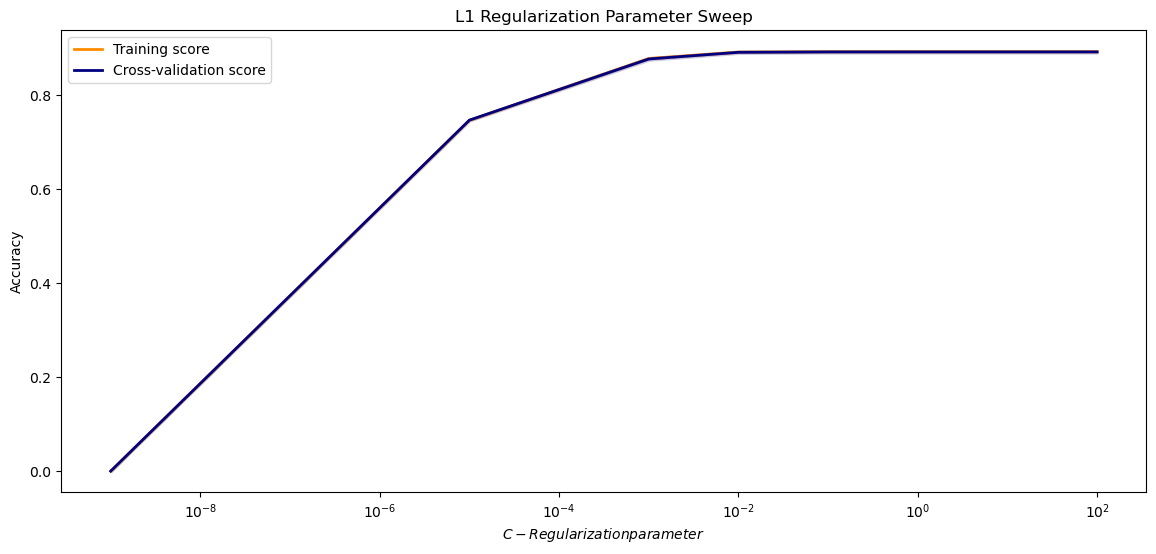

In [46]:
def plot_val_curve(train_scores, val_scores, param_range, plt_title):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(14,6))
    
    plt.title(plt_title)
    plt.xlabel("$C-Regularization parameter$")
    plt.ylabel("Accuracy")
    
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    
    plt.semilogx(param_range, val_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    
    plt.fill_between(param_range, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")

# Number of folds selected for cross-validation is 10

K = 10 
stratified_cv = StratifiedShuffleSplit(n_splits = K, random_state = 0)

lgreg = LogisticRegression(penalty='l1', solver='liblinear',random_state=0, n_jobs=-1, max_iter=1000).fit(X_train, y_train)
param_C_range = [1e-9, 1e-5, 1e-3, 1e-2, 1e-1, 1.0,10,100]
train_scores, val_scores = validation_curve(estimator=lgreg, 
                                            X=X_train, 
                                            y=y_train, 
                                            param_name='C', 
                                            param_range=param_C_range,
                                            cv=stratified_cv,
                                            n_jobs=-1,
                                            scoring='f1')
plot_val_curve(train_scores, val_scores, param_C_range, plt_title='L1 Regularization Parameter Sweep')
plt.xscale('log')
plt.show()

C:\Users\ankit\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.


Test accuracy: 0.907

Test Precision: 0.017

Test Recall: 0.952

Test LogLoss: 3.367

Test AUPRC: 0.735


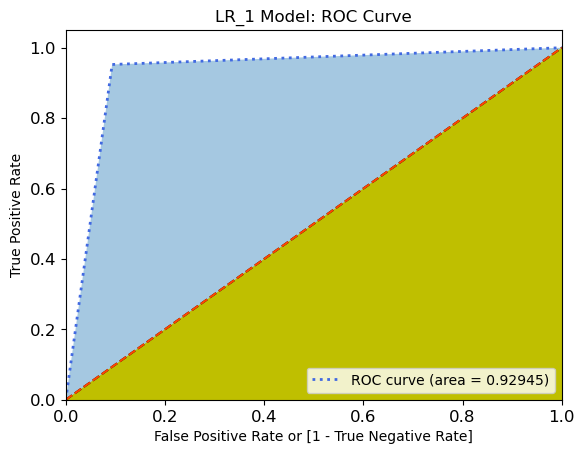

In [47]:
# C value which can be used shall be = 0.01 selected from the graph above
# Predicting class label and probability for the validation data set

lgreg = LogisticRegression(penalty='l1', C=0.01,solver='liblinear',random_state=0, n_jobs=-1, max_iter=1000).fit(X_train, y_train)
y_pred = lgreg.predict(X_test)
y_prob = lgreg.predict_proba(X_test)

    
# Computing classification metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
logloss = metrics.log_loss(y_test, y_pred)
    
# Computing precision, recall, and AUPRC for different levels of thresholds

precisions, recalls, thresholds = metrics.precision_recall_curve(y_test.ravel(), y_prob[:, 1].ravel(), pos_label=1)
prc_auc = metrics.average_precision_score(y_test, y_prob[:,1], average='weighted')

print('Test accuracy: %.3f' % (accuracy))
print('\nTest Precision: %.3f' % (precision))
print('\nTest Recall: %.3f' % (recall))
print('\nTest LogLoss: %.3f' % (logloss))
print('\nTest AUPRC: %.3f' % (prc_auc))


fpr,tpr,thresholds = roc_curve(y_test,y_pred)
auc_score = roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, linestyle = "dotted", color = "royalblue",linewidth = 2, label='ROC curve (area = %0.5f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('LR_1 Model: ROC Curve', fontsize =12)
plt.legend(loc="lower right")
plt.tick_params(labelsize=12)
plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
plt.fill_between(fpr,tpr,alpha = .4)
plt.fill_between([0,1],[0,1],color = "y")

[Text(0, 0.5, 'Not Fraudulent'), Text(0, 1.5, 'Fraudulent')]

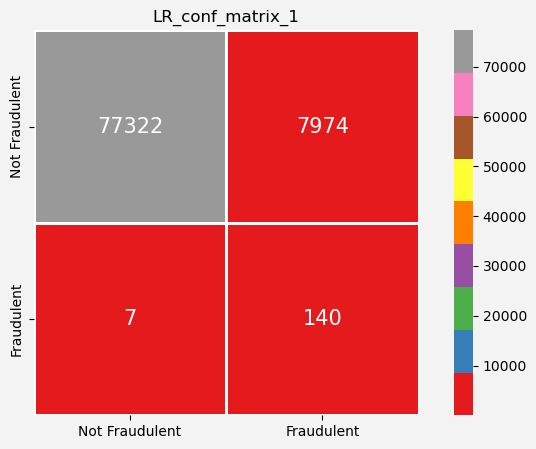

In [48]:
# Plotting the Confusion Matrix

classes = ['Not Fraudulent', 'Fraudulent']
LR_conf_matrix_1 = confusion_matrix(y_test,y_pred)
fig = plt.figure(figsize=(9,5))
fig.set_facecolor("#F3F3F3")
ax= sns.heatmap(LR_conf_matrix_1,annot=True, annot_kws={"fontsize":15}, fmt = "",square = True,
                xticklabels=classes,
                yticklabels=classes,
                linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("LR_conf_matrix_1", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right')

1. Above confusion matrix represents Logistic regression under L1 regularization and C=0.01
2. We will use stratified k fold validation on the XGBoost algorithm next
3. Perform cross-validation using stratified k fold method on the X_train & y_train

In [49]:
from sklearn.model_selection import StratifiedKFold

X_train_p = X_train_pt
y_train_p = y_train_pt
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

print("XGBOOST Classifier: --------------------------")
cv_score_mean=0
for n_estimators in [100,50]:
    for learning_rate in [0.2,0.6]:
        for subsample in [0.3, 0.6, 0.9]:
            print("n_estimators=",n_estimators,"learning_rate=",learning_rate, "subsample=",subsample)
            for train_index, test_index in skf.split(X_train_p, y_train_p):
                print("Train:", train_index, "Test:", test_index)
                X_train_cv, X_test_cv = X_train_p[train_index], X_train_p[test_index]
                y_train_cv, y_test_cv = y_train_p.iloc[train_index], y_train_p.iloc[test_index]

                ros = over_sampling.ADASYN(sampling_strategy='minority', random_state=42)
                X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

                xgboost_classifier= XGBClassifier(n_estimators=n_estimators,
                                                learning_rate=learning_rate,
                                                subsample=subsample, n_jobs=-1,
                                                eval_metric='logloss',
                                                use_label_encoder=False)
                xgboost_classifier.fit(X_ros_cv, y_ros_cv)

                y_test_pred= xgboost_classifier.predict_proba(X_test_cv)
                cv_score= metrics.roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
                cv_score_mean=cv_score_mean+cv_score
            print("Cross Val ROC-AUC Score=", cv_score_mean/3)

XGBOOST Classifier: --------------------------
n_estimators= 100 learning_rate= 0.2 subsample= 0.3
Train: [ 64311  64579  64989 ... 199361 199362 199363] Test: [    0     1     2 ... 66460 66461 66462]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 64311  64579  64989 ... 135239 135266 135333]
Train: [     0      1      2 ... 135239 135266 135333] Test: [132905 132906 132907 ... 199361 199362 199363]
Cross Val ROC-AUC Score= 0.9776863859271474
n_estimators= 100 learning_rate= 0.2 subsample= 0.6
Train: [ 64311  64579  64989 ... 199361 199362 199363] Test: [    0     1     2 ... 66460 66461 66462]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 64311  64579  64989 ... 135239 135266 135333]
Train: [     0      1      2 ... 135239 135266 135333] Test: [132905 132906 132907 ... 199361 199362 199363]
Cross Val ROC-AUC Score= 1.9549009371979642
n_estimators= 100 learning_rate= 0.2 subsample= 0.9
Train: [ 64311  64579  64989 ... 199361 199362 199363] Test: [    0

1. The results shown above suggest we use n_estimators= 100, learning_rate= 0.2 and subsample= 0.3 to obtain highest area under the curve

2. Similarly optimization was performed on other three models as well to check its performance, and parameters were selected based on it

In [50]:
# Finding the best tree in XGB

from xgboost import XGBClassifier

tree_range = range(2, 100, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree,
                      eval_metric='mlogloss',
                      use_label_encoder=False)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))

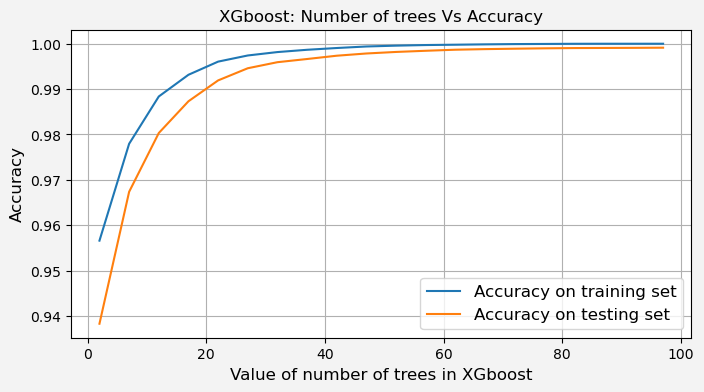

In [51]:
# Generating plot for - XGB to obtain the optimum value of trees to be used

%matplotlib inline
fig = plt.figure(figsize=(8,4))
fig.set_facecolor("#F3F3F3")
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.title('XGboost: Number of trees Vs Accuracy', fontsize =12)
plt.xlabel('Value of number of trees in XGboost', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(visible=None)
plt.legend(loc = "best",
               prop = {"size" : 12})
plt.show()

In [52]:
# Using the optimized parameters for 

xgb=XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train,y_train)
print('Accuracy of XGB n=100 on the testing dataset is :{:.4f}'.format(xgb.score(X_test,y_test)))

Accuracy of XGB n=100 on the testing dataset is :0.9991


In [53]:
# testing various models

model_summary = []
ML_models = {}

In [54]:
%%time

# ML_models = {}

model_index = ['LR','RF','NN', 'GRB', 'DT','KN', 'XGB']
model_sklearn = [LogisticRegression(penalty = 'l2', C = 1, random_state=0),
                 RandomForestClassifier(n_jobs=3, min_samples_split = 20, min_samples_leaf = 5, random_state=0),
                 MLPClassifier([100]*5,early_stopping=True,learning_rate='adaptive',random_state=0),
                 GradientBoostingClassifier(n_estimators = 50, max_depth = 2, random_state = 0),
                 DecisionTreeClassifier(random_state=42, max_depth=6),
                 KNeighborsClassifier(n_neighbors=7, n_jobs=-1),
                 XGBClassifier(n_estimators=100,learning_rate=0.2,subsample=0.3, n_jobs=-1,
                              eval_metric='mlogloss',use_label_encoder=False)]

# model_summary = []

for name,model in zip(model_index,model_sklearn):
    ML_models[name] = model.fit(X_train,y_train)
    preds = model.predict(X_test)
    model_summary.append([name,f1_score(y_test,preds,average='weighted'),accuracy_score(y_test,preds),
                          roc_auc_score(y_test,model.predict_proba(X_test)[:,1]), precision_score(y_test,preds, average='weighted'),
                         recall_score(y_test,preds, average='weighted')])
   
    
print(ML_models)

{'LR': LogisticRegression(C=1, random_state=0), 'RF': RandomForestClassifier(min_samples_leaf=5, min_samples_split=20, n_jobs=3,
                       random_state=0), 'NN': MLPClassifier(early_stopping=True, hidden_layer_sizes=[100, 100, 100, 100, 100],
              learning_rate='adaptive', random_state=0), 'GRB': GradientBoostingClassifier(max_depth=2, n_estimators=50, random_state=0), 'DT': DecisionTreeClassifier(max_depth=6, random_state=42), 'KN': KNeighborsClassifier(n_jobs=-1, n_neighbors=7), 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_ca

In [55]:
# Let us now look at the model evaluation parameters 

model_summary = pd.DataFrame(model_summary,columns=['Name','F1_score','Accuracy', 'AUC_ROC', 'Precision', 'Recall'])
model_summary = model_summary.reset_index()
display(model_summary)

,index,Name,F1_score,Accuracy,AUC_ROC,Precision,Recall
0,0,LR,0.949127,0.906195,0.982625,0.998219,0.906195
1,1,RF,0.999357,0.999356,0.975573,0.999359,0.999356
2,2,NN,0.999276,0.999263,0.956658,0.999293,0.999263
3,3,GRB,0.959120,0.924499,0.977169,0.998163,0.924499
4,4,DT,0.945427,0.899500,0.932208,0.998124,0.899500
5,5,KN,0.998020,0.997589,0.928046,0.998730,0.997589
6,6,XGB,0.998815,0.998713,0.967544,0.998980,0.998713


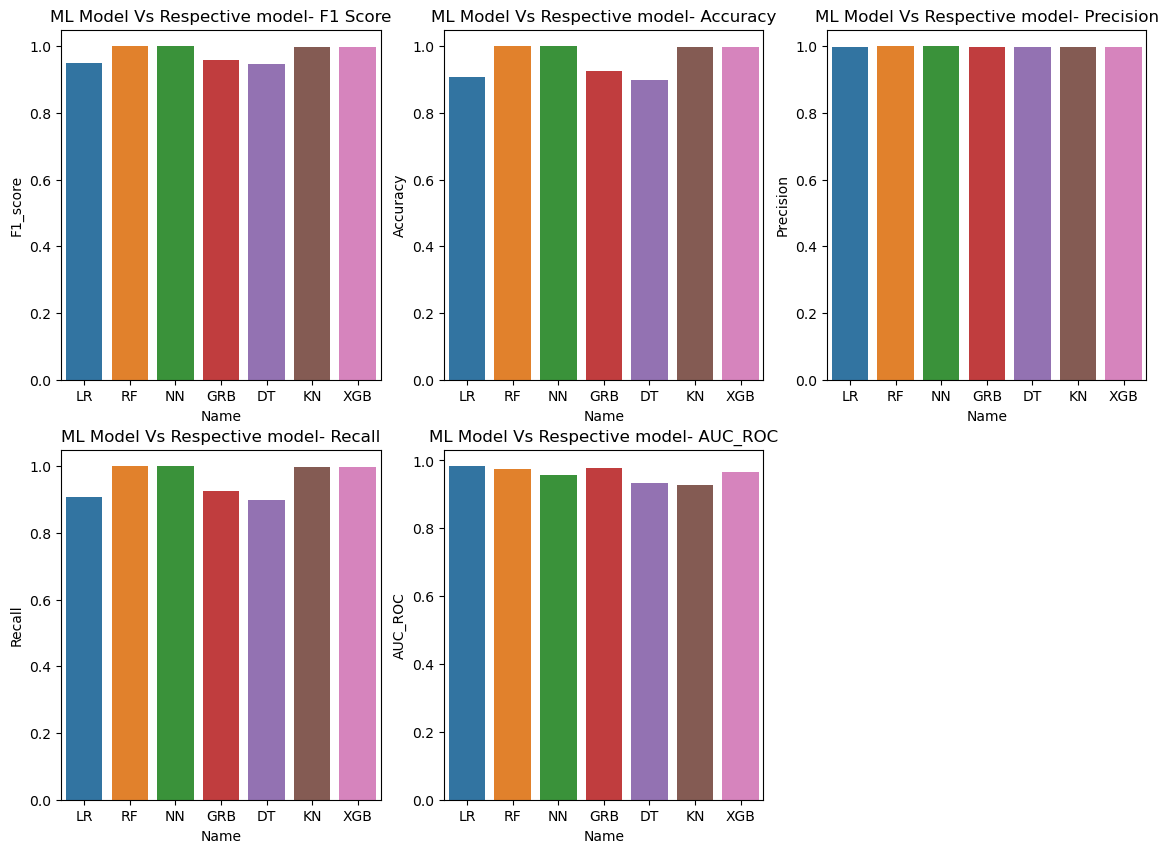

In [56]:
# Plotting all the evaluation parameters of all the models and comparing them to each other

plt.rcParams['figure.figsize']=(14,10)
plt.subplot(231)
g=sns.barplot(data=model_summary, x="Name", y="F1_score")
plt.title('ML Model Vs Respective model- F1 Score')

plt.subplot(232)
g=sns.barplot(data=model_summary, x="Name", y="Accuracy")
plt.title('ML Model Vs Respective model- Accuracy')

plt.subplot(233)
g=sns.barplot(data=model_summary, x="Name", y="Precision")
plt.title('ML Model Vs Respective model- Precision')

plt.subplot(234)
g=sns.barplot(data=model_summary, x="Name", y="Recall")
plt.title('ML Model Vs Respective model- Recall')

plt.subplot(235)
g=sns.barplot(data=model_summary, x="Name", y="AUC_ROC")
plt.title('ML Model Vs Respective model- AUC_ROC')

plt.show()

In [57]:
# Verifying the validity of the different models

# LR Model

ML_test = ML_models['LR'].predict(X_test)
ML_train = ML_models['LR'].predict(X_train)
LR_Model_Residuals = y_train == ML_train

print(); Line_Separator()
print ("LR model :- Number of values correctly predicted:"); Line_Separator()
print(pd.Series(LR_Model_Residuals).value_counts())

# RF Model
ML_test = ML_models['RF'].predict(X_test)
ML_train = ML_models['RF'].predict(X_train)
RF_Model_Residuals = y_train == ML_train

print(); Line_Separator()
print ("RF model :- Number of values correctly predicted:"); Line_Separator()
print(pd.Series(RF_Model_Residuals).value_counts()); Line_Separator()


# NN Model
ML_test = ML_models['NN'].predict(X_test)
ML_train = ML_models['NN'].predict(X_train)
NN_Model_Residuals = y_train == ML_train

print ("NN model :- Number of values correctly predicted:"); Line_Separator()
print(pd.Series(NN_Model_Residuals).value_counts()); Line_Separator()


# GRB Model
ML_test = ML_models['GRB'].predict(X_test)
ML_train = ML_models['GRB'].predict(X_train)
NN_Model_Residuals = y_train == ML_train

print(); Line_Separator()
print ("GRB model :- Number of values correctly predicted:"); Line_Separator()
print(pd.Series(NN_Model_Residuals).value_counts()); Line_Separator()


# DT Model
ML_test = ML_models['DT'].predict(X_test)
ML_train = ML_models['DT'].predict(X_train)
DT_Model_Residuals = y_train == ML_train

print(); Line_Separator()
print ("DT model :- Number of values correctly predicted:"); Line_Separator()
print(pd.Series(DT_Model_Residuals).value_counts()); Line_Separator()


# KN Model
ML_test = ML_models['KN'].predict(X_test)
ML_train = ML_models['KN'].predict(X_train)
KN_Model_Residuals = y_train == ML_train

print(); Line_Separator()
print ("KN model :- Number of values correctly predicted:"); Line_Separator()
print(pd.Series(KN_Model_Residuals).value_counts()); Line_Separator()

# XGB Model
ML_test = ML_models['XGB'].predict(X_test)
ML_train = ML_models['XGB'].predict(X_train)
XGB_Model_Residuals = y_train == ML_train

print(); Line_Separator()
print ("XGB model :- Number of values correctly predicted:"); Line_Separator()
print(pd.Series(XGB_Model_Residuals).value_counts()); Line_Separator()


************************************************** 

LR model :- Number of values correctly predicted:
************************************************** 

Class
True     355906
False     42096
Name: count, dtype: int64

************************************************** 

RF model :- Number of values correctly predicted:
************************************************** 

Class
True     397965
False        37
Name: count, dtype: int64
************************************************** 

NN model :- Number of values correctly predicted:
************************************************** 

Class
True     397948
False        54
Name: count, dtype: int64
************************************************** 


************************************************** 

GRB model :- Number of values correctly predicted:
************************************************** 

Class
True     367039
False     30963
Name: count, dtype: int64
************************************************** 


*********

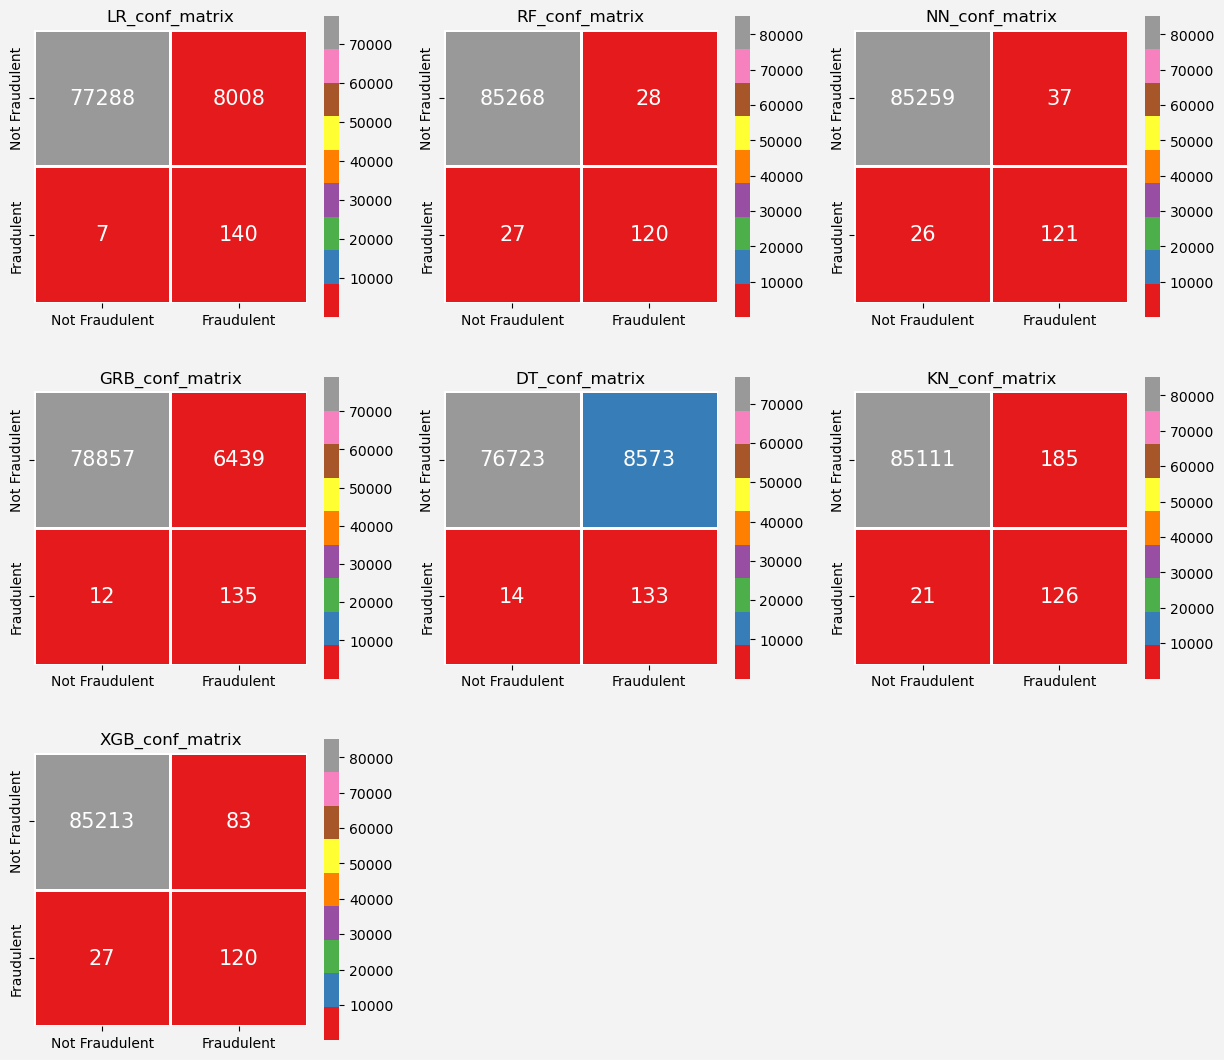

In [58]:
# Confusion matrix for LR, RF, NN, GRB, DT, KN, XGB models

# LR
LR_conf_matrix = confusion_matrix(y_test,ML_models['LR'].predict(X_test))

# RF
RF_conf_matrix = confusion_matrix(y_test,ML_models['RF'].predict(X_test))

# NN
NN_conf_matrix = confusion_matrix(y_test,ML_models['NN'].predict(X_test))

# GRB
GRB_conf_matrix = confusion_matrix(y_test,ML_models['GRB'].predict(X_test))

# DT
DT_conf_matrix = confusion_matrix(y_test,ML_models['DT'].predict(X_test))

# KN
KN_conf_matrix = confusion_matrix(y_test,ML_models['KN'].predict(X_test))

# XGB
XGB_conf_matrix = confusion_matrix(y_test,ML_models['XGB'].predict(X_test))

fig = plt.figure(figsize=(15,18))
fig.set_facecolor("#F3F3F3")
plt.subplot(431)
ax= sns.heatmap(LR_conf_matrix,annot=True, annot_kws={"fontsize":15}, fmt = "",square = True,
                xticklabels=["Not Fraudulent","Fraudulent"],
                yticklabels=["Not Fraudulent","Fraudulent"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("LR_conf_matrix", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right')
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)


plt.subplot(432)
ax= sns.heatmap(RF_conf_matrix,annot=True, annot_kws={"fontsize":15}, fmt = "",square = True,
                xticklabels=["Not Fraudulent","Fraudulent"],
                yticklabels=["Not Fraudulent","Fraudulent"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("RF_conf_matrix", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right')
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)


plt.subplot(433)
ax= sns.heatmap(NN_conf_matrix,annot=True, annot_kws={"fontsize":15}, fmt = "",square = True,
                xticklabels=["Not Fraudulent","Fraudulent"],
                yticklabels=["Not Fraudulent","Fraudulent"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("NN_conf_matrix", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right')
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

plt.subplot(434)
ax= sns.heatmap(GRB_conf_matrix ,annot=True, annot_kws={"fontsize":15}, fmt = "",square = True,
                xticklabels=["Not Fraudulent","Fraudulent"],
                yticklabels=["Not Fraudulent","Fraudulent"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("GRB_conf_matrix", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right')
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

plt.subplot(435)
ax= sns.heatmap(DT_conf_matrix ,annot=True, annot_kws={"fontsize":15}, fmt = "",square = True,
                xticklabels=["Not Fraudulent","Fraudulent"],
                yticklabels=["Not Fraudulent","Fraudulent"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("DT_conf_matrix", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right')
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

plt.subplot(436)
ax= sns.heatmap(KN_conf_matrix ,annot=True, annot_kws={"fontsize":15}, fmt = "",square = True,
                xticklabels=["Not Fraudulent","Fraudulent"],
                yticklabels=["Not Fraudulent","Fraudulent"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("KN_conf_matrix", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right')
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)


plt.subplot(437)
ax= sns.heatmap(XGB_conf_matrix ,annot=True, annot_kws={"fontsize":15}, fmt = "",square = True,
                xticklabels=["Not Fraudulent","Fraudulent"],
                yticklabels=["Not Fraudulent","Fraudulent"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("XGB_conf_matrix", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right')
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [59]:
# Classification report

target_names = ["Not Fraudulent","Fraudulent"]

# LR Model
print(); Line_Separator()
print ("                LR Model - Classification Report"); Line_Separator()
print(classification_report(y_test, ML_models["LR"].predict(X_test))); Line_Separator()

#--------------------------------------------------------------------------------------------
# RF Model
print ("                RF Model - Classification Report"); Line_Separator()
print(classification_report(y_test, ML_models["RF"].predict(X_test))); Line_Separator()

#--------------------------------------------------------------------------------------------
# NN Model
print ("                NN Model - Classification Report"); Line_Separator()
print(classification_report(y_test, ML_models["NN"].predict(X_test))); Line_Separator()

#--------------------------------------------------------------------------------------------
# GRB Model
print ("                GRB Model - Classification Report"); Line_Separator()
print(classification_report(y_test, ML_models["GRB"].predict(X_test))); Line_Separator()


#--------------------------------------------------------------------------------------------
# GRB Model
print ("                DT Model - Classification Report"); Line_Separator()
print(classification_report(y_test, ML_models["DT"].predict(X_test))); Line_Separator()

#--------------------------------------------------------------------------------------------
# KN Model
print ("                KN Model - Classification Report"); Line_Separator()
print(classification_report(y_test, ML_models["KN"].predict(X_test))); Line_Separator()


#--------------------------------------------------------------------------------------------
# XGB Model
print ("                XGB Model - Classification Report"); Line_Separator()
print(classification_report(y_test, ML_models["XGB"].predict(X_test))); Line_Separator()


************************************************** 

                LR Model - Classification Report
************************************************** 

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85296
           1       0.02      0.95      0.03       147

    accuracy                           0.91     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.91      0.95     85443

************************************************** 

                RF Model - Classification Report
************************************************** 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.81      0.82      0.81       147

    accuracy                           1.00     85443
   macro avg       0.91      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443

***********************************

In [60]:
# creating speficity, sensitivity, FPR, positive predictive value and Negative predictive value

# LR model
tn, fp, fn, tp  = confusion_matrix(y_test,ML_models['LR'].predict(X_test)).ravel()

print("            LR Model:")

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', tp / (tp+fn))
 
# Let us calculate specificity
print('Specificity               : ',tn /(tn+fp))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate        : ',fp/(tn+fp))

# positive predictive value 
print('positive predictive value : ', tp / (tp+fp))

# Negative predictive value
print('Negative predictive value : ',tn / (tn+ fn)); Line_Separator()

# ------------------------------------------------------------------------------------------------
# RF model
tn, fp, fn, tp  = confusion_matrix(y_test,ML_models['RF'].predict(X_test)).ravel()

print("            RF Model:")

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', tp / (tp+fn))
 
# Let us calculate specificity
print('Specificity               : ',tn /(tn+fp))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate        : ',fp/(tn+fp))

# positive predictive value 
print('Positive predictive value : ', tp / (tp+fp))

# Negative predictive value
print('Negative predictive value : ',tn / (tn+ fn)); Line_Separator()

#-----------------------------------------------------------------------------------------------------
# NN model
tn, fp, fn, tp  = confusion_matrix(y_test,ML_models['NN'].predict(X_test)).ravel()


print("            NN Model:")

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', tp / (tp+fn))
 
# Let us calculate specificity
print('Specificity               : ',tn /(tn+fp))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate        : ',fp/(tn+fp))

# positive predictive value 
print('Positive predictive value : ', tp / (tp+fp))

# Negative predictive value
print('Negative predictive value : ',tn / (tn+ fn)); Line_Separator()

#-----------------------------------------------------------------------------------------------------

# GRB model
tn, fp, fn, tp  = confusion_matrix(y_test,ML_models['GRB'].predict(X_test)).ravel()


print("            GRB Model:")

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', tp / (tp+fn))
 
# Let us calculate specificity
print('Specificity               : ',tn /(tn+fp))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate        : ',fp/(tn+fp))

# positive predictive value 
print('Positive predictive value : ', tp / (tp+fp))

# Negative predictive value
print('Negative predictive value : ',tn / (tn+ fn)); Line_Separator()


#-----------------------------------------------------------------------------------------------------

# DT model
tn, fp, fn, tp  = confusion_matrix(y_test,ML_models['DT'].predict(X_test)).ravel()


print("            DT Model:")

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', tp / (tp+fn))
 
# Let us calculate specificity
print('Specificity               : ',tn /(tn+fp))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate        : ',fp/(tn+fp))

# positive predictive value 
print('Positive predictive value : ', tp / (tp+fp))

# Negative predictive value
print('Negative predictive value : ',tn / (tn+ fn)); Line_Separator()


#-----------------------------------------------------------------------------------------------------

# KN model
tn, fp, fn, tp  = confusion_matrix(y_test,ML_models['KN'].predict(X_test)).ravel()


print("            KN Model:")

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', tp / (tp+fn))
 
# Let us calculate specificity
print('Specificity               : ',tn /(tn+fp))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate        : ',fp/(tn+fp))

# positive predictive value 
print('Positive predictive value : ', tp / (tp+fp))

# Negative predictive value
print('Negative predictive value : ',tn / (tn+ fn)); Line_Separator()

#-----------------------------------------------------------------------------------------------------

# DT model
tn, fp, fn, tp  = confusion_matrix(y_test,ML_models['XGB'].predict(X_test)).ravel()


print("            XGB Model:")

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', tp / (tp+fn))
 
# Let us calculate specificity
print('Specificity               : ',tn /(tn+fp))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate        : ',fp/(tn+fp))

# positive predictive value 
print('Positive predictive value : ', tp / (tp+fp))

# Negative predictive value
print('Negative predictive value : ',tn / (tn+ fn)); Line_Separator()

            LR Model:
Sensitivity               :  0.9523809523809523
Specificity               :  0.9061151753892328
false postive rate        :  0.0938848246107672
positive predictive value :  0.01718213058419244
Negative predictive value :  0.9999094378679086
************************************************** 

            RF Model:
Sensitivity               :  0.8163265306122449
Specificity               :  0.9996717313824799
False postive rate        :  0.0003282686175201651
Positive predictive value :  0.8108108108108109
Negative predictive value :  0.9996834515505012
************************************************** 

            NN Model:
Sensitivity               :  0.8231292517006803
Specificity               :  0.9995662164697054
False postive rate        :  0.00043378353029450387
Positive predictive value :  0.7658227848101266
Negative predictive value :  0.9996951398252917
************************************************** 

            GRB Model:
Sensitivity             

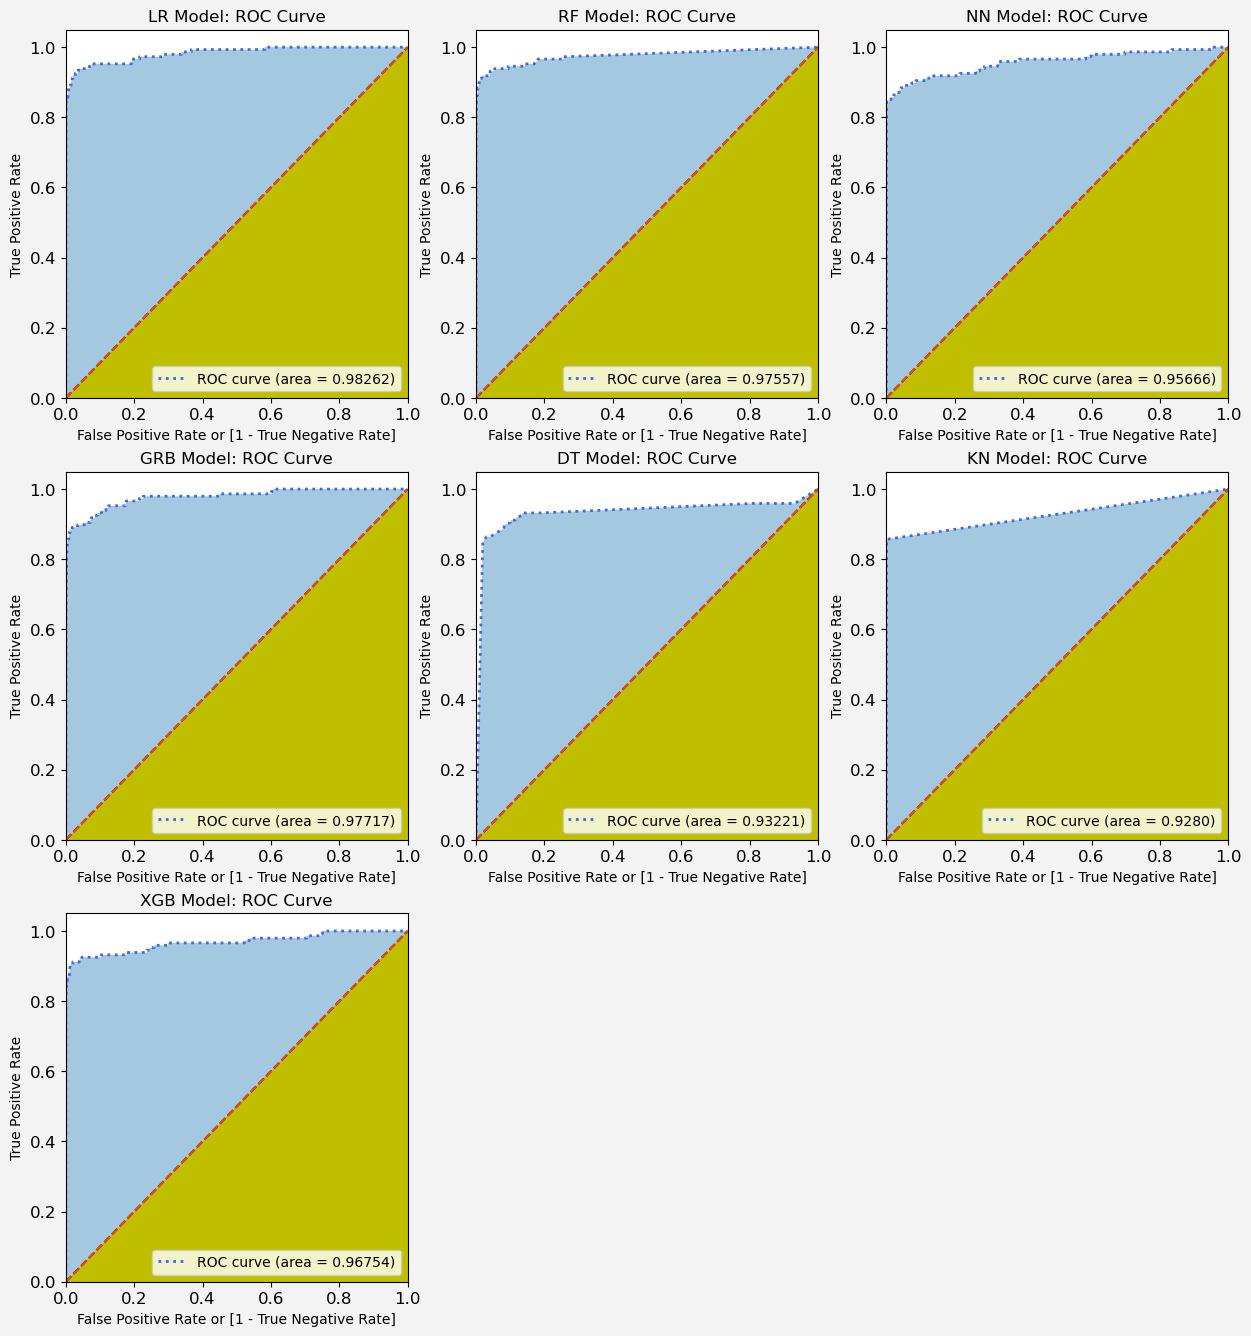

In [61]:
# ROC - Curves for all the models

fig = plt.figure(figsize=(15,22))
fig.set_facecolor("#F3F3F3")


# LR Model
plt.subplot(431)
fpr,tpr,thresholds = roc_curve(y_test,ML_models['LR'].predict_proba(X_test)[:,1])
auc_score = roc_auc_score(y_test,ML_models['LR'].predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = "dotted", color = "royalblue",linewidth = 2, label='ROC curve (area = %0.5f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('LR Model: ROC Curve', fontsize =12)
plt.legend(loc="lower right")
plt.tick_params(labelsize=12)
plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
plt.fill_between(fpr,tpr,alpha = .4)
plt.fill_between([0,1],[0,1],color = "y")

# -----------------------------------------------------------------------------------------------------------------------
# RF Model
plt.subplot(432)
fpr,tpr,thresholds = roc_curve(y_test,ML_models['RF'].predict_proba(X_test)[:,1])
auc_score = roc_auc_score(y_test,ML_models['RF'].predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = "dotted", color = "royalblue",linewidth = 2, label='ROC curve (area = %0.5f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('RF Model: ROC Curve', fontsize =12)
plt.legend(loc="lower right")
plt.tick_params(labelsize=12)
plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
plt.fill_between(fpr,tpr,alpha = .4)
plt.fill_between([0,1],[0,1],color = "y")

# -----------------------------------------------------------------------------------------------------------------------
# NN Model
plt.subplot(433)
fpr,tpr,thresholds = roc_curve(y_test,ML_models['NN'].predict_proba(X_test)[:,1])
auc_score = roc_auc_score(y_test,ML_models['NN'].predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = "dotted", color = "royalblue",linewidth = 2, label='ROC curve (area = %0.5f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('NN Model: ROC Curve', fontsize =12)
plt.legend(loc="lower right")
plt.tick_params(labelsize=12)
plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
plt.fill_between(fpr,tpr,alpha = .4)
plt.fill_between([0,1],[0,1],color = "y")

# -----------------------------------------------------------------------------------------------------------------------
# GRB Model
plt.subplot(434)
fpr,tpr,thresholds = roc_curve(y_test,ML_models['GRB'].predict_proba(X_test)[:,1])
auc_score = roc_auc_score(y_test,ML_models['GRB'].predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = "dotted", color = "royalblue",linewidth = 2, label='ROC curve (area = %0.5f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('GRB Model: ROC Curve', fontsize =12)
plt.legend(loc="lower right")
plt.tick_params(labelsize=12)
plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
plt.fill_between(fpr,tpr,alpha = .4)
plt.fill_between([0,1],[0,1],color = "y")

# -----------------------------------------------------------------------------------------------------------------------
# DT Model
plt.subplot(435)
fpr,tpr,thresholds = roc_curve(y_test,ML_models['DT'].predict_proba(X_test)[:,1])
auc_score = roc_auc_score(y_test,ML_models['DT'].predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = "dotted", color = "royalblue",linewidth = 2, label='ROC curve (area = %0.5f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('DT Model: ROC Curve', fontsize =12)
plt.legend(loc="lower right")
plt.tick_params(labelsize=12)
plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
plt.fill_between(fpr,tpr,alpha = .4)
plt.fill_between([0,1],[0,1],color = "y")

# -----------------------------------------------------------------------------------------------------------------------
# KN Model
plt.subplot(436)
fpr,tpr,thresholds = roc_curve(y_test,ML_models['KN'].predict_proba(X_test)[:,1])
auc_score = roc_auc_score(y_test,ML_models['KN'].predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = "dotted", color = "royalblue",linewidth = 2, label='ROC curve (area = %0.4f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('KN Model: ROC Curve', fontsize =12)
plt.legend(loc="lower right")
plt.tick_params(labelsize=12)
plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
plt.fill_between(fpr,tpr,alpha = .4)
plt.fill_between([0,1],[0,1],color = "y")

# -----------------------------------------------------------------------------------------------------------------------
# XGB Model
plt.subplot(437)
fpr,tpr,thresholds = roc_curve(y_test,ML_models['XGB'].predict_proba(X_test)[:,1])
auc_score = roc_auc_score(y_test,ML_models['XGB'].predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = "dotted", color = "royalblue",linewidth = 2, label='ROC curve (area = %0.5f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('XGB Model: ROC Curve', fontsize =12)
plt.legend(loc="lower right")
plt.tick_params(labelsize=12)
plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
plt.fill_between(fpr,tpr,alpha = .4)
plt.fill_between([0,1],[0,1],color = "y")
plt.show()

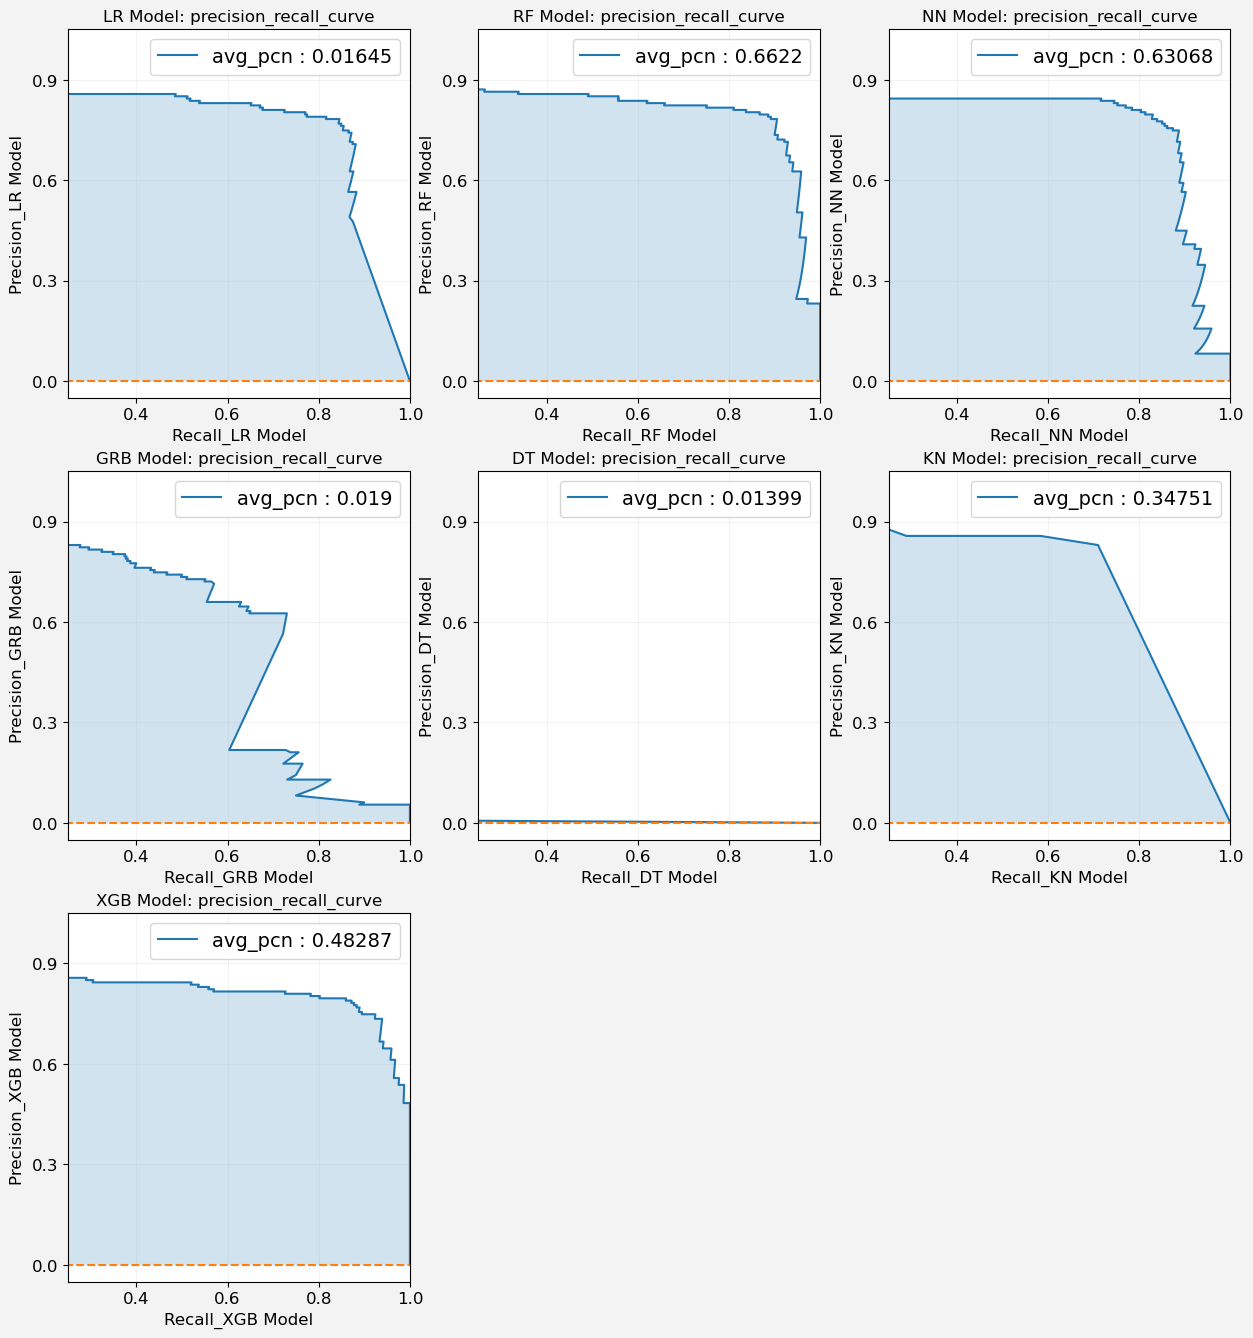

In [62]:
# Precision recall curves for all the models

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# LR_Model

fig = plt.figure(figsize=(15,22))
fig.set_facecolor("#F3F3F3")
plt.subplot(431)

recall,precision,thresholds = precision_recall_curve(y_test,ML_models['LR'].predict_proba(X_test)[:,1])
plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(y_test,ML_models['LR'].predict(X_test)),5))))
plt.plot([0,1],[0,0],linestyle = "dashed")
plt.fill_between(recall,precision,alpha = .2)
plt.legend(loc = 'best',
               prop = {"size" : 14})
plt.grid(True,alpha = .15)
plt.title( 'LR Model: precision_recall_curve', fontsize =12)
plt.xlabel("Recall_LR Model",fontsize =12)
plt.ylabel("Precision_LR Model",fontsize =12)
plt.xlim([0.25,1])
plt.yticks(np.arange(0,1,.3))
plt.tick_params(labelsize=12)

#------------------------------------------------------------------------------------------------------
# RF_Model

plt.subplot(432)

recall,precision,thresholds = precision_recall_curve(y_test,ML_models['RF'].predict_proba(X_test)[:,1])
plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(y_test,ML_models['RF'].predict(X_test)),5))))
plt.plot([0,1],[0,0],linestyle = "dashed")
plt.fill_between(recall,precision,alpha = .2)
plt.legend(loc = 'best',
               prop = {"size" : 14})
plt.grid(True,alpha = .15)
plt.title( 'RF Model: precision_recall_curve', fontsize =12)
plt.xlabel("Recall_RF Model",fontsize =12)
plt.ylabel("Precision_RF Model",fontsize =12)
plt.xlim([0.25,1])
plt.yticks(np.arange(0,1,.3))
plt.tick_params(labelsize=12)

#------------------------------------------------------------------------------------------------------
# NN_Model

plt.subplot(433)

recall,precision,thresholds = precision_recall_curve(y_test,ML_models['NN'].predict_proba(X_test)[:,1])
plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(y_test,ML_models['NN'].predict(X_test)),5))))
plt.plot([0,1],[0,0],linestyle = "dashed")
plt.fill_between(recall,precision,alpha = .2)
plt.legend(loc = 'best',
               prop = {"size" : 14})
plt.grid(True,alpha = .15)
plt.title( 'NN Model: precision_recall_curve', fontsize =12)
plt.xlabel("Recall_NN Model",fontsize =12)
plt.ylabel("Precision_NN Model",fontsize =12)
plt.xlim([0.25,1])
plt.yticks(np.arange(0,1,.3))
plt.tick_params(labelsize=12)

#------------------------------------------------------------------------------------------------------
# GRB_Model

plt.subplot(434)

recall,precision,thresholds = precision_recall_curve(y_test,ML_models['GRB'].predict_proba(X_test)[:,1])
plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(y_test,ML_models['GRB'].predict(X_test)),5))))
plt.plot([0,1],[0,0],linestyle = "dashed")
plt.fill_between(recall,precision,alpha = .2)
plt.legend(loc = 'best',
               prop = {"size" : 14})
plt.grid(True,alpha = .15)
plt.title( 'GRB Model: precision_recall_curve', fontsize =12)
plt.xlabel("Recall_GRB Model",fontsize =12)
plt.ylabel("Precision_GRB Model",fontsize =12)
plt.xlim([0.25,1])
plt.yticks(np.arange(0,1,.3))
plt.tick_params(labelsize=12)

#------------------------------------------------------------------------------------------------------
# DT_Model

plt.subplot(435)

recall,precision,thresholds = precision_recall_curve(y_test,ML_models['DT'].predict_proba(X_test)[:,1])
plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(y_test,ML_models['DT'].predict(X_test)),5))))
plt.plot([0,1],[0,0],linestyle = "dashed")
plt.fill_between(recall,precision,alpha = .2)
plt.legend(loc = 'best',
               prop = {"size" : 14})
plt.grid(True,alpha = .15)
plt.title( 'DT Model: precision_recall_curve', fontsize =12)
plt.xlabel("Recall_DT Model",fontsize =12)
plt.ylabel("Precision_DT Model",fontsize =12)
plt.xlim([0.25,1])
plt.yticks(np.arange(0,1,.3))
plt.tick_params(labelsize=12)

#------------------------------------------------------------------------------------------------------
# KN_Model

plt.subplot(436)

recall,precision,thresholds = precision_recall_curve(y_test,ML_models['KN'].predict_proba(X_test)[:,1])
plt.plot(recall,precision,linewidth = 1.5,
            label = ("avg_pcn : " + 
                     str(np.around(average_precision_score(y_test,ML_models['KN'].predict(X_test)),5))))
plt.plot([0,1],[0,0],linestyle = "dashed")
plt.fill_between(recall,precision,alpha = .2)
plt.legend(loc = 'best',
               prop = {"size" : 14})
plt.grid(True,alpha = .15)
plt.title( 'KN Model: precision_recall_curve', fontsize =12)
plt.xlabel("Recall_KN Model",fontsize =12)
plt.ylabel("Precision_KN Model",fontsize =12)
plt.xlim([0.25,1])
plt.yticks(np.arange(0,1,.3))
plt.tick_params(labelsize=12)

#------------------------------------------------------------------------------------------------------
# XGB_Model

plt.subplot(437)

recall,precision,thresholds = precision_recall_curve(y_test,ML_models['XGB'].predict_proba(X_test)[:,1])
plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(y_test,ML_models['XGB'].predict(X_test)),5))))
plt.plot([0,1],[0,0],linestyle = "dashed")
plt.fill_between(recall,precision,alpha = .2)
plt.legend(loc = 'best',
               prop = {"size" : 14})
plt.grid(True,alpha = .15)
plt.title( 'XGB Model: precision_recall_curve', fontsize =12)
plt.xlabel("Recall_XGB Model",fontsize =12)
plt.ylabel("Precision_XGB Model",fontsize =12)
plt.xlim([0.25,1])
plt.yticks(np.arange(0,1,.3))
plt.tick_params(labelsize=12)

plt.show()

In [63]:
# convert df with label

df= pd.DataFrame(X_train)
df_X_train=df.rename(columns={ 0:'V1', 1:'V2', 2:'V3', 3: 'V4', 4: 'V5', 5: 'V6', 6: 'V7', 7: 'V8',
                              8: 'V9', 9: 'V10', 10: 'V11', 11: 'V12', 12: 'V13', 13: 'V14', 14: 'V15',15: 'V16',
                              16:'V17', 17: 'V18', 18: 'V19', 19: 'V20', 20: 'V21', 21: 'V22',22: 'V23', 23: 'V24',
                              24 :'V25', 25: 'V26', 26: 'V27', 27: 'V28', 28:'Amount'})
df_X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.337709,-0.011023,-0.572350,-0.687908,1.331832,1.284314,0.397865,0.585072,0.069767,-0.304146,...,-0.082598,-0.068469,-0.012837,0.397293,-3.182719,-1.647232,0.759623,0.775937,0.244989,0.269011
1,1.518951,-0.071777,-1.047548,0.158042,0.435654,-0.166155,0.151416,-0.321247,0.396965,0.068521,...,-0.113054,-0.440668,-1.079534,0.423901,0.014218,-0.297824,0.507331,-0.193784,-0.170010,-1.004383
2,-0.311979,0.028279,1.185485,0.544933,0.159722,0.888859,1.305879,-1.017889,0.722047,1.265560,...,0.067455,0.038431,1.488058,-0.664343,1.283863,-0.365347,-1.381321,-2.863038,-3.751963,1.537100
3,0.767455,-0.410898,0.269801,-0.396163,-0.835233,-0.635224,-0.531822,-0.106145,-0.570592,0.599153,...,-0.087920,-0.002879,-0.266770,0.277155,0.527881,0.257804,-0.840708,0.013834,0.062033,-0.866143
4,-0.969774,0.362173,0.319440,-0.343066,0.610948,-0.324587,0.805867,-0.167556,-0.003581,-0.976288,...,-0.096515,-0.289305,-0.554192,-0.355484,1.004389,1.342997,1.082635,0.145030,0.469381,0.946421


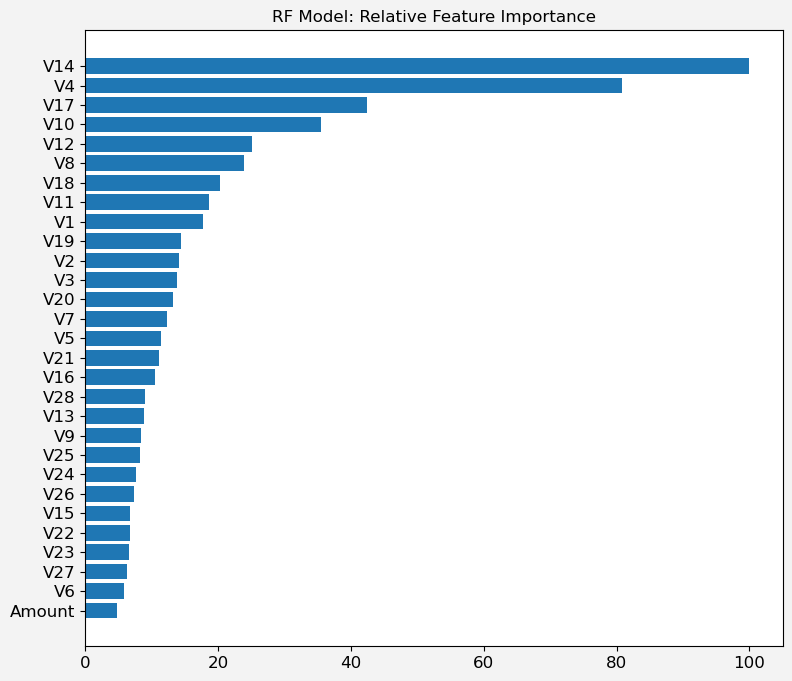

In [64]:
# variables important 
# Model - RF 

importances = ML_models['RF'].feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(df_X_train.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5

# plot the result
fig = plt.figure(figsize=(9,8))
fig.set_facecolor("#F3F3F3")
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('RF Model: Relative Feature Importance', fontsize=12)
plt.tick_params(labelsize=12)
plt.show()

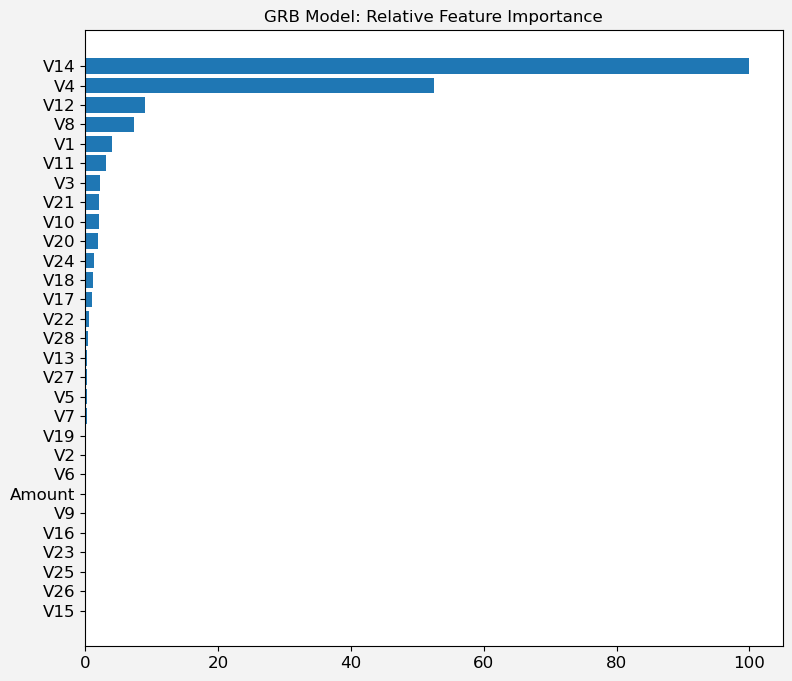

In [65]:
# variables important 
# Model - GRB

importances = ML_models['GRB'].feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(df_X_train.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5

# plot the result
fig = plt.figure(figsize=(9,8))
fig.set_facecolor("#F3F3F3")
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('GRB Model: Relative Feature Importance', fontsize=12)
plt.tick_params(labelsize=12)

plt.show()

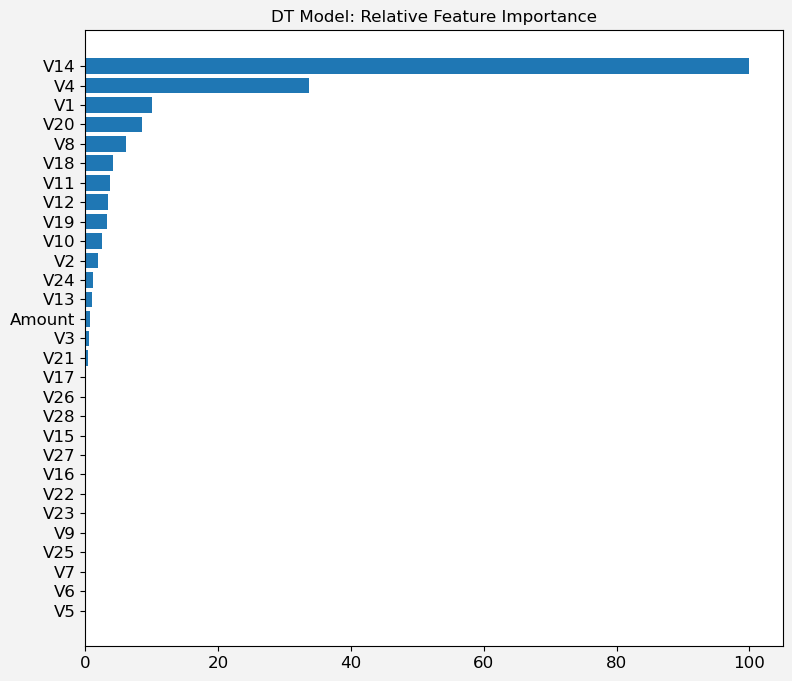

In [66]:
# variables important 
# Model - DT

importances = ML_models['DT'].feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(df_X_train.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5

# plot the result
fig = plt.figure(figsize=(9,8))
fig.set_facecolor("#F3F3F3")
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('DT Model: Relative Feature Importance', fontsize=12)
plt.tick_params(labelsize=12)

plt.show()

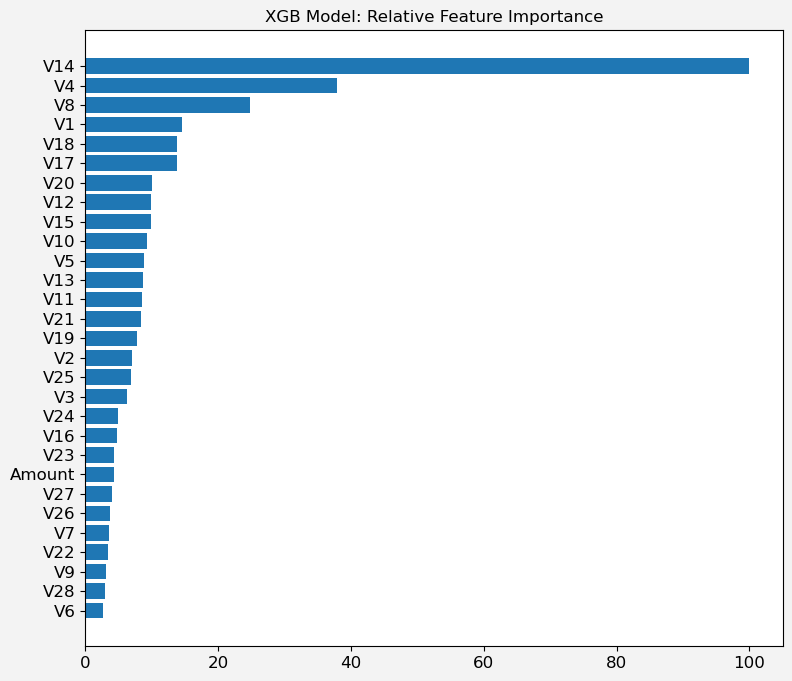

In [67]:
# variables important 
# Model - XGB
importances = ML_models['XGB'].feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(df_X_train.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5

# plot the result
fig = plt.figure(figsize=(9,8))
fig.set_facecolor("#F3F3F3")
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('XGB Model: Relative Feature Importance', fontsize=12)
plt.tick_params(labelsize=12)

plt.show()

In [68]:
# XGB Model
df_X_t =pd.DataFrame(X_test)
df_X_test=df_X_t.rename(columns={0:'V1', 1:'V2', 2:'V3', 3: 'V4', 4: 'V5', 5: 'V6', 6: 'V7', 7: 'V8',
                              8: 'V9', 9: 'V10', 10: 'V11', 11: 'V12', 12: 'V13', 13: 'V14', 14: 'V15',15: 'V16',
                              16:'V17', 17: 'V18', 18: 'V19', 19: 'V20', 20: 'V21', 21: 'V22',22: 'V23', 23: 'V24',
                              24 :'V25', 25: 'V26', 26: 'V27', 27: 'V28', 28:'Amount'})

In [69]:
# Cutoff - target for each model on probability

# LR Model 
LR_y_pred_test = ML_models['LR'].predict_proba(X_test)
LR_y_pred_df = pd.DataFrame(LR_y_pred_test)
LR_y_pred = LR_y_pred_df.iloc[:,[1]]

y_test.index =LR_y_pred.index
LR_y_pred_final = pd.concat([y_test,LR_y_pred],axis=1)
 
LR_y_pred_final= LR_y_pred_final.rename(columns={ 1 : 'LR_Fraudulent_prob'})

# RF Model 
RF_y_pred_test = ML_models['RF'].predict_proba(X_test)
RF_y_pred_df = pd.DataFrame(RF_y_pred_test)
RF_y_pred = RF_y_pred_df.iloc[:,[1]]

y_test.index =RF_y_pred.index
RF_y_pred_final = pd.concat([y_test,RF_y_pred],axis=1)
 
RF_y_pred_final= RF_y_pred_final.rename(columns={ 1 : 'RF_Fraudulent_prob'})

# NN Model 
NN_y_pred_test = ML_models['NN'].predict_proba(X_test)
NN_y_pred_df = pd.DataFrame(NN_y_pred_test)
NN_y_pred = NN_y_pred_df.iloc[:,[1]]

y_test.index =NN_y_pred.index
NN_y_pred_final = pd.concat([y_test,NN_y_pred],axis=1)
 
NN_y_pred_final= NN_y_pred_final.rename(columns={ 1 : 'NN_Fraudulent_prob'})

# GRB Model 
GRB_y_pred_test = ML_models['GRB'].predict_proba(X_test)
GRB_y_pred_df = pd.DataFrame(GRB_y_pred_test)
GRB_y_pred = GRB_y_pred_df.iloc[:,[1]]

y_test.index =GRB_y_pred.index
GRB_y_pred_final = pd.concat([y_test,GRB_y_pred],axis=1)
 
GRB_y_pred_final= GRB_y_pred_final.rename(columns={ 1 : 'GRB_Fraudulent_prob'})

# DT Model

DT_y_pred_test = ML_models['DT'].predict_proba(X_test)
DT_y_pred_df = pd.DataFrame(DT_y_pred_test)
DT_y_pred = DT_y_pred_df.iloc[:,[1]]

y_test.index =DT_y_pred.index
DT_y_pred_final = pd.concat([y_test,DT_y_pred],axis=1)
 
DT_y_pred_final= DT_y_pred_final.rename(columns={ 1 : 'DT_Fraudulent_prob'})

# KN Model 
KN_y_pred_test = ML_models['KN'].predict_proba(X_test)
KN_y_pred_df = pd.DataFrame(KN_y_pred_test)
KN_y_pred = KN_y_pred_df.iloc[:,[1]]

y_test.index =KN_y_pred.index
KN_y_pred_final = pd.concat([y_test,KN_y_pred],axis=1)
 
KN_y_pred_final= KN_y_pred_final.rename(columns={ 1 : 'KN_Fraudulent_prob'})


XGB_y_pred_test = ML_models['XGB'].predict_proba(X_test)
XGB_y_pred_df = pd.DataFrame(XGB_y_pred_test)
XGB_y_pred = XGB_y_pred_df.iloc[:,[1]]

y_test.index =XGB_y_pred.index
XGB_y_pred_final = pd.concat([y_test,XGB_y_pred],axis=1)
 
XGB_y_pred_final= XGB_y_pred_final.rename(columns={ 1 : 'XGB_Fraudulent_prob'})

In [70]:
# Let us create columns with different probability cutoffs 
# LR Model
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
     LR_y_pred_final[i]= LR_y_pred_final.LR_Fraudulent_prob.map(lambda x: 1 if x > i else 0)
print(); Line_Separator1()
print ("LR Model -create columns with different probability cutoffs"); Line_Separator1()
print(LR_y_pred_final.head()); Line_Separator1()

# RF Model
for j in numbers:
     RF_y_pred_final[j]= RF_y_pred_final.RF_Fraudulent_prob.map(lambda x: 1 if x > j else 0)
print(); Line_Separator1()
print ("RF Model -create columns with different probability cutoffs"); Line_Separator1()
print(RF_y_pred_final.head()); Line_Separator1()


# NN Model
for k in numbers:
     NN_y_pred_final[k]= NN_y_pred_final.NN_Fraudulent_prob.map(lambda x: 1 if x > k else 0)
print(); Line_Separator1()
print ("NN Model -create columns with different probability cutoffs"); Line_Separator1()
print(NN_y_pred_final.head()); Line_Separator1()

# GRB Model
for l in numbers:
     GRB_y_pred_final[l]= GRB_y_pred_final.GRB_Fraudulent_prob.map(lambda x: 1 if x > l else 0)
print(); Line_Separator1()
print ("GRB Model -create columns with different probability cutoffs"); Line_Separator1()
print(GRB_y_pred_final.head());Line_Separator1()

# DT Model
for m in numbers:
     DT_y_pred_final[m]= DT_y_pred_final.DT_Fraudulent_prob.map(lambda x: 1 if x > m else 0)
print(); Line_Separator1()
print ("DT Model -create columns with different probability cutoffs"); Line_Separator1()
print(DT_y_pred_final.head());Line_Separator1()

#KN Model
for n in numbers:
     KN_y_pred_final[n]= KN_y_pred_final.KN_Fraudulent_prob.map(lambda x: 1 if x > n else 0)
print(); Line_Separator1()
print ("KN Model -create columns with different probability cutoffs"); Line_Separator1()
print(KN_y_pred_final.head());Line_Separator1()

# XGB Model
for o in numbers:
     XGB_y_pred_final[o]= XGB_y_pred_final.XGB_Fraudulent_prob.map(lambda x: 1 if x > o else 0)
print(); Line_Separator1()
print ("XGB Model -create columns with different probability cutoffs"); Line_Separator1()
print(XGB_y_pred_final.head());Line_Separator1()


**************************************************************************************************** 

LR Model -create columns with different probability cutoffs
**************************************************************************************************** 

   Class  LR_Fraudulent_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0            0.538806    1    1    1    1    1    1    0    0    0    0
1      0            0.376913    1    1    1    1    0    0    0    0    0    0
2      0            0.379280    1    1    1    1    0    0    0    0    0    0
3      0            0.086613    1    0    0    0    0    0    0    0    0    0
4      0            0.022598    1    0    0    0    0    0    0    0    0    0
**************************************************************************************************** 


**************************************************************************************************** 

RF Model -create columns with different probability 

In [71]:
# Now let us calculate accuracy , sensitivity, and specificity for various probability cutoffs.

# LR model
print(); Line_Separator1()
print ("LR Model -prob, accuracy, sensi, speci"); Line_Separator1()
LR_cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(LR_y_pred_final.Class, LR_y_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    LR_cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(LR_cutoff_df); Line_Separator1()


# RF model
print(); Line_Separator1()
print ("RF Model -prob, accuracy, sensi, speci"); Line_Separator1()
RF_cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(RF_y_pred_final.Class, RF_y_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    RF_cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(RF_cutoff_df); Line_Separator1()


# NN model
print(); Line_Separator1()
print ("NN Model -prob, accuracy, sensi, speci"); Line_Separator1()
NN_cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(NN_y_pred_final.Class, NN_y_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    NN_cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(NN_cutoff_df); Line_Separator1()


# GRB model
print(); Line_Separator1()
print ("GRB Model -prob, accuracy, sensi, speci"); Line_Separator1()
GRB_cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(GRB_y_pred_final.Class, GRB_y_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    GRB_cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(GRB_cutoff_df); Line_Separator1()


# DT model
print(); Line_Separator1()
print ("DT Model -prob, accuracy, sensi, speci"); Line_Separator1()
DT_cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(DT_y_pred_final.Class, DT_y_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    DT_cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(DT_cutoff_df); Line_Separator1()

# KN model
print(); Line_Separator1()
print ("DT Model -prob, accuracy, sensi, speci"); Line_Separator1()
KN_cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(KN_y_pred_final.Class, KN_y_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    KN_cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(KN_cutoff_df); Line_Separator1()

# XGB model
print(); Line_Separator1()
print ("XGB Model -prob, accuracy, sensi, speci"); Line_Separator1()
XGB_cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(XGB_y_pred_final.Class, XGB_y_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    XGB_cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(XGB_cutoff_df); Line_Separator1()


**************************************************************************************************** 

LR Model -prob, accuracy, sensi, speci
**************************************************************************************************** 

     prob  accuracy     sensi     speci
0.0   0.0  0.001720  0.000000  1.000000
0.1   0.1  0.595543  0.594858  0.993197
0.2   0.2  0.752045  0.751665  0.972789
0.3   0.3  0.831935  0.831727  0.952381
0.4   0.4  0.876140  0.876008  0.952381
0.5   0.5  0.906195  0.906115  0.952381
0.6   0.6  0.929848  0.929821  0.945578
0.7   0.7  0.949768  0.949787  0.938776
0.8   0.8  0.967768  0.967841  0.925170
0.9   0.9  0.980361  0.980480  0.911565
**************************************************************************************************** 


**************************************************************************************************** 

RF Model -prob, accuracy, sensi, speci
********************************************************************

In [72]:
## Finding the optimal cutoff threshold

def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
LR_threshold = Find_Optimal_Cutoff(LR_y_pred_final.Class,LR_y_pred_final.LR_Fraudulent_prob)
RF_threshold = Find_Optimal_Cutoff(RF_y_pred_final.Class,RF_y_pred_final.RF_Fraudulent_prob)
NN_threshold = Find_Optimal_Cutoff(NN_y_pred_final.Class,NN_y_pred_final.NN_Fraudulent_prob)
GRB_threshold = Find_Optimal_Cutoff(GRB_y_pred_final.Class,GRB_y_pred_final.GRB_Fraudulent_prob)
DT_threshold = Find_Optimal_Cutoff(DT_y_pred_final.Class,DT_y_pred_final.DT_Fraudulent_prob)
KN_threshold = Find_Optimal_Cutoff(KN_y_pred_final.Class,KN_y_pred_final.KN_Fraudulent_prob)
XGB_threshold = Find_Optimal_Cutoff(XGB_y_pred_final.Class,XGB_y_pred_final.XGB_Fraudulent_prob)

print(); Line_Separator1()
print ("ML_Models: Optimal Cutoff Threshold"); Line_Separator1()

print('LR Model Cutoff threshold: ', LR_threshold)
print('RF Model Cutoff threshold: ', RF_threshold)
print('NN Model Cutoff threshold: ', NN_threshold)
print('GRB Model Cutoff threshold: ', GRB_threshold)
print('DT Model Cutoff threshold: ', DT_threshold)
print('KN Model Cutoff threshold: ', KN_threshold)
print('XGB Model Cutoff threshold: ', XGB_threshold); Line_Separator1()


**************************************************************************************************** 

ML_Models: Optimal Cutoff Threshold
**************************************************************************************************** 

LR Model Cutoff threshold:  [0.642035466094832]
RF Model Cutoff threshold:  [0.016428571428571428]
NN Model Cutoff threshold:  [4.329170269913972e-07]
GRB Model Cutoff threshold:  [0.4782707970396372]
DT Model Cutoff threshold:  [0.6093012806110987]
KN Model Cutoff threshold:  [0.14285714285714285]
XGB Model Cutoff threshold:  [0.0010882408823817968]
**************************************************************************************************** 



In [73]:
# Creating new column 'predicted' with 1 if Fraudulent > optimal cutoff threshold of each model else 0
# LR model
LR_y_pred_final['pred_Fraudulent'] = LR_y_pred_final.LR_Fraudulent_prob.map(lambda x: 1 if x > 0.6420354633413775 else 0)
print(); Line_Separator()
print('LR_Model');Line_Separator()
print (LR_y_pred_final.Class.value_counts())

# RF Model
RF_y_pred_final['pred_Fraudulent'] = RF_y_pred_final.RF_Fraudulent_prob.map(lambda x: 1 if x >0.016428571428571428 else 0)
print(); Line_Separator()
print('RF_Model');Line_Separator()
print (RF_y_pred_final.Class.value_counts())

# NN Model
NN_y_pred_final['pred_Fraudulent'] = NN_y_pred_final.NN_Fraudulent_prob.map(lambda x: 1 if x >0.00000000005824619724 else 0)
print(); Line_Separator()
print('NN_Model');Line_Separator()
print (NN_y_pred_final.Class.value_counts())

# GRB Model
GRB_y_pred_final['pred_Fraudulent'] = GRB_y_pred_final.GRB_Fraudulent_prob.map(lambda x: 1 if x >0.4782707970396372 else 0)
print(); Line_Separator()
print('GRB_Model');Line_Separator()
print (GRB_y_pred_final.Class.value_counts())

# DT Model
DT_y_pred_final['pred_Fraudulent'] = DT_y_pred_final.DT_Fraudulent_prob.map(lambda x: 1 if x >0.6093012806110987 else 0)
print(); Line_Separator()
print('DT_Model');Line_Separator()
print(DT_y_pred_final.Class.value_counts())

# KN Model
KN_y_pred_final['pred_Fraudulent'] = KN_y_pred_final.KN_Fraudulent_prob.map(lambda x: 1 if x > 0.14285714285714285 else 0)
print();Line_Separator()
print('KN_Model');Line_Separator()
print (KN_y_pred_final.Class.value_counts())

# XGB Model

XGB_y_pred_final['pred_Fraudulent'] = XGB_y_pred_final.XGB_Fraudulent_prob.map(lambda x: 1 if x >0.07481219619512558 else 0)
print();Line_Separator()
print('XGB_Model');Line_Separator()
print (XGB_y_pred_final.Class.value_counts());Line_Separator()


************************************************** 

LR_Model
************************************************** 

Class
0    85296
1      147
Name: count, dtype: int64

************************************************** 

RF_Model
************************************************** 

Class
0    85296
1      147
Name: count, dtype: int64

************************************************** 

NN_Model
************************************************** 

Class
0    85296
1      147
Name: count, dtype: int64

************************************************** 

GRB_Model
************************************************** 

Class
0    85296
1      147
Name: count, dtype: int64

************************************************** 

DT_Model
************************************************** 

Class
0    85296
1      147
Name: count, dtype: int64

************************************************** 

KN_Model
************************************************** 

Class
0    85296
1      147
Name:

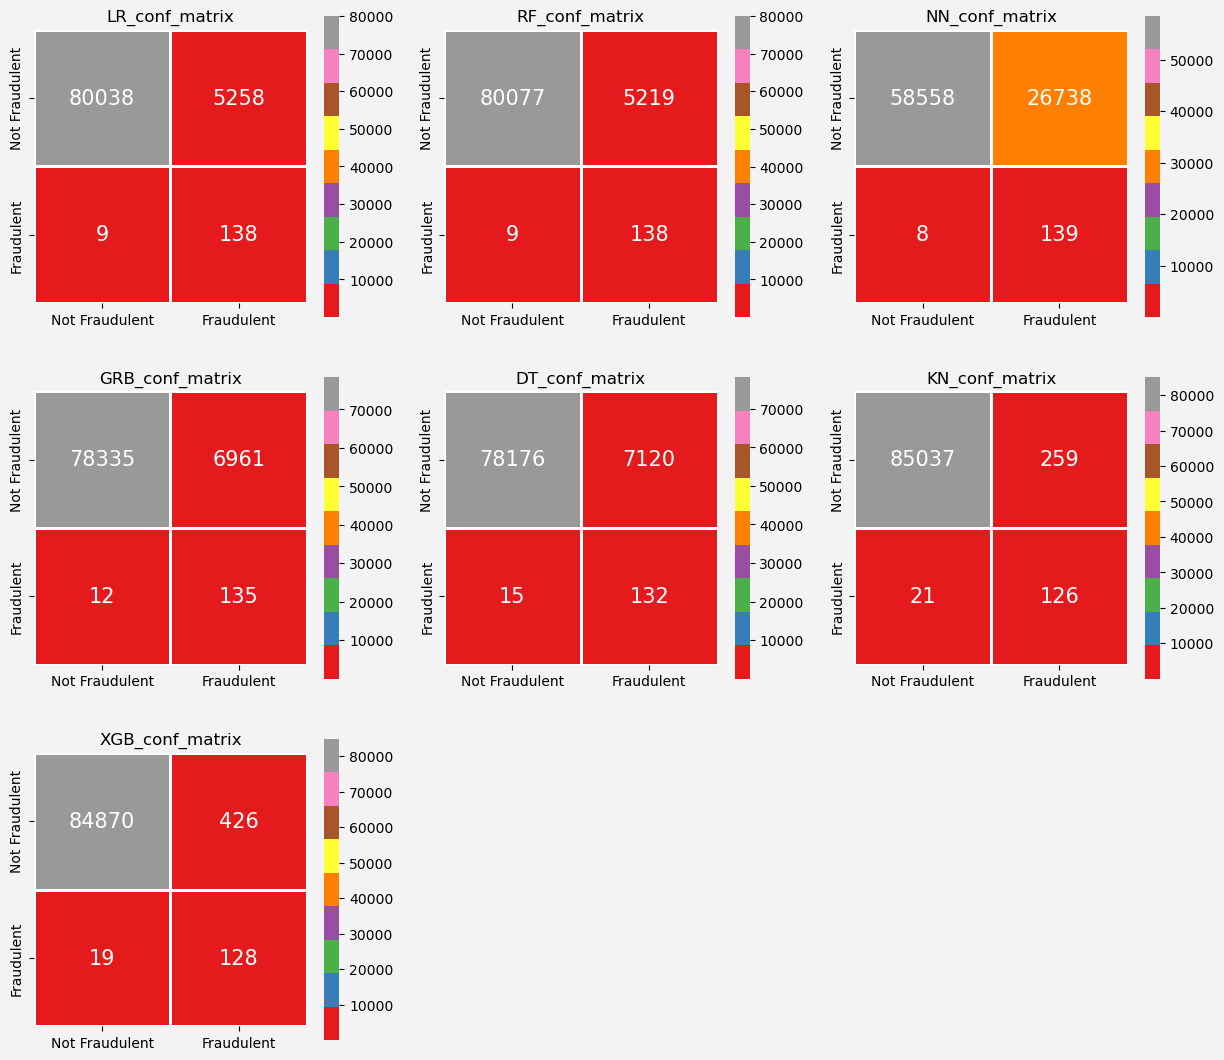

In [74]:
# Confusion matrix for LR, RF, NN, GRB, DT, KN, XGB models after incorporating cutoff traget value of each model

# LR
LR_conf_matrix = metrics.confusion_matrix(LR_y_pred_final.Class, LR_y_pred_final.pred_Fraudulent)

# RF
RF_conf_matrix = metrics.confusion_matrix(RF_y_pred_final.Class, RF_y_pred_final.pred_Fraudulent)

# NN
NN_conf_matrix = metrics.confusion_matrix(NN_y_pred_final.Class, NN_y_pred_final.pred_Fraudulent)

# GRB
GRB_conf_matrix = metrics.confusion_matrix(GRB_y_pred_final.Class, GRB_y_pred_final.pred_Fraudulent)

# DT
DT_conf_matrix = metrics.confusion_matrix(DT_y_pred_final.Class, DT_y_pred_final.pred_Fraudulent)

# KN
KN_conf_matrix = metrics.confusion_matrix(KN_y_pred_final.Class, KN_y_pred_final.pred_Fraudulent)

# XGB
XGB_conf_matrix = metrics.confusion_matrix(XGB_y_pred_final.Class, XGB_y_pred_final.pred_Fraudulent)



fig = plt.figure(figsize=(15,18))
fig.set_facecolor("#F3F3F3")
plt.subplot(431)
ax= sns.heatmap(LR_conf_matrix,annot=True, annot_kws={"fontsize":15}, fmt = "",square = True,
                xticklabels=["Not Fraudulent","Fraudulent"],
                yticklabels=["Not Fraudulent","Fraudulent"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("LR_conf_matrix", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right')
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)


plt.subplot(432)
ax= sns.heatmap(RF_conf_matrix,annot=True, annot_kws={"fontsize":15}, fmt = "",square = True,
                xticklabels=["Not Fraudulent","Fraudulent"],
                yticklabels=["Not Fraudulent","Fraudulent"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("RF_conf_matrix", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right')
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)


plt.subplot(433)
ax= sns.heatmap(NN_conf_matrix,annot=True, annot_kws={"fontsize":15}, fmt = "",square = True,
                xticklabels=["Not Fraudulent","Fraudulent"],
                yticklabels=["Not Fraudulent","Fraudulent"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("NN_conf_matrix", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right')
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

plt.subplot(434)
ax= sns.heatmap(GRB_conf_matrix ,annot=True, annot_kws={"fontsize":15}, fmt = "",square = True,
                xticklabels=["Not Fraudulent","Fraudulent"],
                yticklabels=["Not Fraudulent","Fraudulent"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("GRB_conf_matrix", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right')
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

plt.subplot(435)
ax= sns.heatmap(DT_conf_matrix ,annot=True, annot_kws={"fontsize":15}, fmt = "",square = True,
                xticklabels=["Not Fraudulent","Fraudulent"],
                yticklabels=["Not Fraudulent","Fraudulent"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("DT_conf_matrix", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right')
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

plt.subplot(436)
ax= sns.heatmap(KN_conf_matrix ,annot=True, annot_kws={"fontsize":15}, fmt = "",square = True,
                xticklabels=["Not Fraudulent","Fraudulent"],
                yticklabels=["Not Fraudulent","Fraudulent"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("KN_conf_matrix", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right')
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)


plt.subplot(437)
ax= sns.heatmap(XGB_conf_matrix ,annot=True, annot_kws={"fontsize":15}, fmt = "",square = True,
                xticklabels=["Not Fraudulent","Fraudulent"],
                yticklabels=["Not Fraudulent","Fraudulent"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("XGB_conf_matrix", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right')
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [75]:
# Confusion matrix for LR, RF, NN, GRB, DT, KN, XGB models after incorporating cutoff target value of each model

# LR model 

TP_LR = LR_conf_matrix[1,1] # true positive 
TN_LR = LR_conf_matrix[0,0] # true negatives
FP_LR = LR_conf_matrix[0,1] # false positives
FN_LR = LR_conf_matrix[1,0] # false negatives

# RF model 

TP_RF = RF_conf_matrix[1,1] # true positive 
TN_RF = RF_conf_matrix[0,0] # true negatives
FP_RF = RF_conf_matrix[0,1] # false positives
FN_RF = RF_conf_matrix[1,0] # false negatives

# NN model 

TP_NN = NN_conf_matrix[1,1] # true positive 
TN_NN = NN_conf_matrix[0,0] # true negatives
FP_NN = NN_conf_matrix[0,1] # false positives
FN_NN = NN_conf_matrix[1,0] # false negatives

# GRB model 

TP_GRB = GRB_conf_matrix[1,1] # true positive 
TN_GRB = GRB_conf_matrix[0,0] # true negatives
FP_GRB = GRB_conf_matrix[0,1] # false positives
FN_GRB = GRB_conf_matrix[1,0] # false negatives

# DT model 

TP_DT = DT_conf_matrix[1,1] # true positive 
TN_DT = DT_conf_matrix[0,0] # true negatives
FP_DT = DT_conf_matrix[0,1] # false positives
FN_DT = DT_conf_matrix[1,0] # false negatives

# KN model 

TP_KN = KN_conf_matrix[1,1] # true positive 
TN_KN = KN_conf_matrix[0,0] # true negatives
FP_KN = KN_conf_matrix[0,1] # false positives
FN_KN = KN_conf_matrix[1,0] # false negatives

# XGB  model 

TP_XGB = XGB_conf_matrix[1,1] # true positive 
TN_XGB = XGB_conf_matrix[0,0] # true negatives
FP_XGB = XGB_conf_matrix[0,1] # false positives
FN_XGB = XGB_conf_matrix[1,0] # false negatives

In [76]:
print();Line_Separator()

# LR model statistics-----------------------------------------------------------
print("LR Model :");Line_Separator()

# Let's see the sensitivity of our logistic regression model
print('Sensitivity / Recall      : ', TP_LR / float(TP_LR+FN_LR))
 
# Let us calculate specificity
print('Specificity / Precision   : ',TN_LR / float(TN_LR+FP_LR))

# Calculate false postive rate - predicting Fraudulent when does not have Fraudulent
print('False postive rate        : ',FP_LR/ float(TN_LR+FP_LR))

# positive predictive value 
print('Positive predictive value : ', TP_LR / float(TP_LR+FP_LR))

# Negative predictive value
print('Negative predictive value : ', TN_LR / float(TN_LR+ FN_LR))

# F1 Score

LR_Precision  = TP_LR/float(TP_LR + FP_LR)
LR_recall     = TP_LR/float(TP_LR + FN_LR)
LR_F1_Score      = 2*((LR_Precision*LR_recall)/(LR_Precision+LR_recall))
print ('F1 Score                  : ',  LR_F1_Score)

# Accuracy 

LR_Accuracy  = (TP_LR + TN_LR)/ float(TP_LR+TN_LR+FP_LR+FN_LR)
print ('Accuracy                  : ',  LR_Accuracy);Line_Separator()



# RF model statistics -------------------------------------------------------------

print("RF Model :");Line_Separator()

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', TP_RF / float(TP_RF+FN_RF))
 
# Let us calculate specificity
print('Specificity               : ',TN_RF / float(TN_RF+FP_RF))

# Calculate false postive rate - predicting Fraudulent when does not have Fraudulent
print('False postive rate        : ',FP_RF/ float(TN_RF+FP_RF))

# positive predictive value 
print('Positive predictive value : ', TP_RF / float(TP_RF+FP_RF))

# Negative predictive value
print('Negative predictive value : ',TN_RF / float(TN_RF+ FN_RF))

# F1 Score

RF_Precision  = TP_RF/float(TP_RF + FP_RF)
RF_recall     = TP_LR/float(TP_RF + FN_RF)
RF_F1_Score      = 2*((RF_Precision*RF_recall)/(RF_Precision+RF_recall))
print ('F1 Score                  : ',  RF_F1_Score)

# Accuracy 

RF_Accuracy  = (TP_RF + TN_RF)/ float(TP_RF+TN_RF+FP_RF+FN_RF)
print ('Accuracy                  : ',  RF_Accuracy);Line_Separator()


# NN model statistics -------------------------------------------------------------

print("NN Model :");Line_Separator()

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', TP_NN / float(TP_NN+FN_NN))
 
# Let us calculate specificity
print('Specificity               : ',TN_NN / float(TN_NN+FP_NN))

# Calculate false postive rate - predicting Fraudulent when does not have Fraudulent
print('False postive rate        : ',FP_NN/ float(TN_NN+FP_NN))

# positive predictive value 
print('Positive predictive value : ', TP_NN / float(TP_NN+FP_NN))

# Negative predictive value
print('Negative predictive value : ', TN_NN / float(TN_NN+ FN_NN))

# F1 Score

NN_Precision  = TP_NN/float(TP_NN + FP_NN)
NN_recall     = TP_NN/float(TP_NN + FN_NN)
NN_F1_Score      = 2*((NN_Precision*NN_recall)/(NN_Precision+NN_recall))
print ('F1 Score                  : ',  NN_F1_Score)

# Accuracy 

NN_Accuracy  = (TP_NN + TN_NN)/ float(TP_NN+TN_NN+FP_NN+FN_NN)
print ('Accuracy                  : ',  NN_Accuracy);Line_Separator()

# GRB model statistics -------------------------------------------------------------

print("GRB Model :");Line_Separator()

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', TP_GRB / float(TP_GRB+FN_GRB))
 
# Let us calculate specificity
print('Specificity               : ',TN_GRB / float(TN_GRB+FP_GRB))

# Calculate false postive rate - predicting Fraudulent when does not have Fraudulent
print('False postive rate        : ',FP_GRB/ float(TN_GRB+FP_GRB))

# positive predictive value 
print('Positive predictive value : ', TP_GRB / float(TP_GRB+FP_GRB))

# Negative predictive value
print('Negative predictive value : ', TN_GRB / float(TN_GRB+ FN_GRB))

# F1 Score

GRB_Precision  = TP_GRB/float(TP_GRB + FP_GRB)
GRB_recall     = TP_GRB/float(TP_GRB + FN_GRB)
GRB_F1_Score      = 2*((GRB_Precision*GRB_recall)/(GRB_Precision+GRB_recall))
print ('F1 Score                  : ',  GRB_F1_Score)

# Accuracy 

GRB_Accuracy  = (TP_GRB + TN_GRB)/ float(TP_GRB+TN_GRB+FP_GRB+FN_GRB)
print ('Accuracy                  : ',  GRB_Accuracy);Line_Separator()

# DT model statistics -------------------------------------------------------------

print("DT Model :");Line_Separator()

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', TP_DT / float(TP_DT+FN_DT))
 
# Let us calculate specificity
print('Specificity               : ',TN_DT / float(TN_DT+FP_DT))

# Calculate false postive rate - predicting Fraudulent when does not have Fraudulent
print('False postive rate        : ',FP_DT/ float(TN_DT+FP_DT))

# positive predictive value 
print('Positive predictive value : ', TP_DT / float(TP_DT+FP_DT))

# Negative predictive value
print('Negative predictive value : ', TN_DT / float(TN_DT+ FN_DT))

# F1 Score

DT_Precision  = TP_DT/float(TP_DT + FP_DT)
DT_recall     = TP_DT/float(TP_DT + FN_DT)
DT_F1_Score      = 2*((DT_Precision*DT_recall)/(DT_Precision+DT_recall))
print ('F1 Score                  : ',  DT_F1_Score)

# Accuracy 

DT_Accuracy  = (TP_DT + TN_DT)/ float(TP_DT+TN_DT+FP_DT+FN_DT)
print ('Accuracy                  : ',  DT_Accuracy);Line_Separator()

# KN model statistics -------------------------------------------------------------

print("KN Model :");Line_Separator()

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', TP_KN / float(TP_KN+FN_KN))
 
# Let us calculate specificity
print('Specificity               : ',TN_KN / float(TN_KN+FP_KN))

# Calculate false postive rate - predicting Fraudulent when does not have Fraudulent
print('False postive rate        : ',FP_KN/ float(TN_KN+FP_KN))

# positive predictive value 
print('Positive predictive value : ', TP_KN / float(TP_KN+FP_KN))

# Negative predictive value
print('Negative predictive value : ',TN_KN / float(TN_KN+ FN_KN))

# F1 Score

KN_Precision  = TP_KN/float(TP_KN + FP_KN)
KN_recall     = TP_KN/float(TP_KN + FN_KN)
KN_F1_Score      = 2*((KN_Precision*KN_recall)/(KN_Precision+KN_recall))
print ('F1 Score                  : ',  KN_F1_Score)

# Accuracy 

KN_Accuracy  = (TP_KN + TN_KN)/ float(TP_KN+TN_KN+FP_KN+FN_KN)
print ('Accuracy                  : ', KN_Accuracy);Line_Separator()

# XGB model statistics -------------------------------------------------------------

print("XGB Model :");Line_Separator()

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', TP_XGB / float(TP_XGB+FN_XGB))
 
# Let us calculate specificity
print('Specificity               : ',TN_XGB / float(TN_XGB+FP_XGB))

# Calculate false postive rate -predicting Fraudulent when does not have Fraudulent
print('False postive rate        : ',FP_XGB/ float(TN_XGB+FP_XGB))

# positive predictive value 
print('Positive predictive value : ', TP_XGB / float(TP_XGB+FP_XGB))

# Negative predictive value
print('Negative predictive value : ',TN_XGB / float(TN_XGB+ FN_XGB))

# F1 Score

XGB_Precision  = TP_XGB/float(TP_XGB + FP_XGB)
XGB_recall     = TP_XGB/float(TP_XGB + FN_XGB)
XGB_F1_Score      = 2*((XGB_Precision*XGB_recall)/(XGB_Precision+XGB_recall))
print ('F1 Score                  : ',  XGB_F1_Score)

# Accuracy 

XGB_Accuracy  = (TP_XGB + TN_XGB)/ float(TP_XGB+TN_XGB+FP_XGB+FN_XGB)
print ('Accuracy                  : ',  XGB_Accuracy);Line_Separator()


************************************************** 

LR Model :
************************************************** 

Sensitivity / Recall      :  0.9387755102040817
Specificity / Precision   :  0.9383558431813919
False postive rate        :  0.06164415681860814
Positive predictive value :  0.02557449962935508
Negative predictive value :  0.9998875660549427
F1 Score                  :  0.04979253112033195
Accuracy                  :  0.9383565651955105
************************************************** 

RF Model :
************************************************** 

Sensitivity               :  0.9387755102040817
Specificity               :  0.9388130744700807
False postive rate        :  0.06118692552991934
Positive predictive value :  0.025760686951652043
Negative predictive value :  0.9998876208076318
F1 Score                  :  0.0501453488372093
Accuracy                  :  0.9388130098428192
************************************************** 

NN Model :
***********************

## CONCLUSION

1.We have created 5 Models and have evaluated all of these models based on different evaluation metrics for these models. 
The parameter area under the ROC curve plays an important role when we select the model in this study.

2. Apart from Area under the ROC curve and precision/recall values, we have to consider the computation time when we think
of any model here, as the amount of data we believe here is very high. Different models performed well on this data 
significant difference being the computation timing between these models. KNN model was not advisable as the information 
we have has more data points, more than 10k in it, which essentially increases the computational time of the model.

3. Other metrics considered were Accuracy, Sensitivity/Recall, and Specificity/Precision. The selected model should strike
the right balance between precision and recall. Identifying the fraud precisely is as important as reducing the 
misidentification of these transactions because both situations result in a loss for the client. So the model selected 
shall have the correct precision-recall with Area under the ROC curve. Model recommendations:
    1) Based on the Area under the ROC curve, we can consider the logistic regression model with an l2 penalty can be used 
    as the Area under the ROC curve is around 0.9862, which is the highest among all the other models.
    The Sensitivity/Recall for the LR model is 0.9387, and the Specificity/Precision stands at 0.9383, which are both 
    quite good values.
    2) Next model which is recommended is GRB Model. The Area under the ROC curve for this model is 0.977, which is an 
    excellent value among other models. The Sensitivity/Recall for the LR model is 0.9183, and the Specificity/Precision 
    is 0.9183 with an accuracy of .918, which is very well-balanced for our scenario.

4. Other models, such as Random forest and XG boost, also have thriving areas under the ROC curve with values .975 
and .966 and well-balanced precision/recall values and can be considered for evaluation.